In [2]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
plt.style.use('default')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

In [3]:
def getData(num_samples):
    save_folder = 'train_0.5_valid_0.7_test'
    train_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_NaNmean.csv')
    X_train = train_data.drop(['Species'], axis = 1).values
    y_train = train_data[['Species']].copy().values
    valid_data = pd.read_csv('../data/' + save_folder + '/valid_data_NaNmean.csv')
    X_valid = valid_data.drop(['Species'], axis = 1).values
    y_valid = valid_data[['Species']].copy().values

    y_train = np.squeeze(y_train)
    n_values = np.max(y_train) + 1
    y_train = np.eye(n_values)[y_train]

    y_valid = np.squeeze(y_valid)
    n_values = np.max(y_valid) + 1
    y_valid = np.eye(n_values)[y_valid]
    return X_train, y_train, X_valid, y_valid

def getDataNormalization(num_samples):
    save_folder = 'train_0.5_valid_0.7_test'
    train_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_Normalization.csv')
    #X_train = train_data.drop(['Species', 'Culmen Length (mm)'], axis = 1).values
    X_train = train_data.drop(['Species'], axis = 1).values
    y_train = train_data[['Species']].copy().values
    valid_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_valid.csv')
    #X_valid = valid_data.drop(['Species', 'Culmen Length (mm)'], axis = 1).values
    X_valid = valid_data.drop(['Species'], axis = 1).values
    y_valid = valid_data[['Species']].copy().values
    
    # label should be int
    y_train = np.floor(y_train + 1.1).astype(int)
    y_train = np.squeeze(y_train)
    n_values = np.max(y_train) + 1
    y_train = np.eye(n_values)[y_train]
    
    # label should be int
    y_valid = np.floor(y_valid + 1.1).astype(int)
    y_valid = np.squeeze(y_valid)
    n_values = np.max(y_valid) + 1
    y_valid = np.eye(n_values)[y_valid]
    return X_train, y_train, X_valid, y_valid

def getAccResult(history):
    history_dict = history.history
    val_acc_values = history_dict['val_accuracy']
    print(max(val_acc_values), val_acc_values.index(max(val_acc_values)))
    
def getHisAcc(history):
    history_dict = history.history
    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    return acc_values, val_acc_values

In [75]:
X_train, y_train, X_valid, y_valid = getDataNormalization(50)
tf.keras.backend.clear_session()
model = Sequential()

activation = 'relu'
model.add(Dense(16, input_shape=(6,), activation = activation, kernel_initializer=None, ))
model.add(BatchNormalization())
model.add(Dense(16, activation = activation))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax', name='output'))

optimizer = Adam(lr=0.01)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

history = model.fit(X_train,
    y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_valid, y_valid))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                112       
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 output (Dense)              (None, 3)                 51        
                                                                 
Total params: 563
Trainable params: 499
Non-trainable pa

D:\Programming\Anaconda\envs\Billie9\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



4/4 [==============================] - 1s 92ms/step - loss: 1.4681 - accuracy: 0.4400 - val_loss: 1.0179 - val_accuracy: 0.4853
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6093 - accuracy: 0.8000 - val_loss: 0.7889 - val_accuracy: 0.7353
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.2938 - accuracy: 0.9400 - val_loss: 0.6407 - val_accuracy: 0.9706
Epoch 4/100
4/4 [==============================] - 0s 14ms/step - loss: 0.2511 - accuracy: 0.9600 - val_loss: 0.5369 - val_accuracy: 0.9559
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 0.1418 - accuracy: 1.0000 - val_loss: 0.4795 - val_accuracy: 0.9706
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 0.1039 - accuracy: 0.9800 - val_loss: 0.4282 - val_accuracy: 0.9559
Epoch 7/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0850 - accuracy: 0.9800 - val_loss: 0.3857 - val_accuracy: 0.9559
Epoch 8/100
4/4 [===============

In [4]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((50, 7), (50, 3), (68, 7), (68, 3))

In [5]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((50, 7), (50, 3), (68, 7), (68, 3))

In [6]:
X_train

array([[ 1.39206105,  1.02151552, -0.01107447, -0.2652594 ,  1.29117612,
         1.75273728, -1.08911786],
       [ 0.67996266, -1.22110911,  1.16558801,  0.87319297, -0.75424151,
        -0.60882851,  0.78867155],
       [-0.89030557,  0.34872813, -1.39538328, -0.63525642,  0.84190876,
         0.5798402 ,  0.78867155],
       [ 2.19545409,  1.47004044,  0.40421817, -0.20833678,  1.76946374,
         1.51579281, -1.08911786],
       [ 0.5338912 ,  0.40479374, -0.42636711, -1.00525344,  1.8354091 ,
         1.43394748,  0.78867155],
       [ 0.44259653, -1.27717472,  1.37323434,  1.2716513 , -0.20895097,
        -1.64785169, -1.08911786],
       [ 0.2600072 , -0.77258418,  0.95794169,  1.2716513 , -0.28466535,
        -1.42073194, -1.08911786],
       [ 0.4791144 ,  0.79725305, -0.77244431, -0.83448559,  1.08186815,
         1.36961401,  0.78867155],
       [-1.41981462,  0.34872813, -0.42636711, -0.83448559,  0.40479442,
        -0.20654908,  0.78867155],
       [ 0.314784  , -1.9499

In [77]:
def runANN(activation, epochs, lr, X_train, y_train, X_valid, y_valid, norm = False):
    tf.keras.backend.clear_session()
    model = Sequential()
    model.add(Dense(16, input_shape=(7,), activation = activation))
    if norm:
        model.add(BatchNormalization())
    model.add(Dense(16, activation = activation))
    if norm:
        model.add(BatchNormalization())
    model.add(Dense(3, activation='softmax', name='output'))

    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    #print(model.summary())

    history = model.fit(X_train,
        y_train,
        epochs=epochs,
        batch_size=16,
        validation_data=(X_valid, y_valid))
    
    return history

In [8]:
X_train, y_train, X_valid, y_valid = getData(50)
his_1 = runANN('relu', 1000, 0.1, X_train, y_train, X_valid, y_valid)
# his_01 = runANN('relu', 1000, 0.01, X_train, y_train, X_valid, y_valid)
# his_001 = runANN('relu', 1000, 0.001, X_train, y_train, X_valid, y_valid)

Epoch 1/1000
4/4 [==============================] - 1s 81ms/step - loss: 2193.0361 - accuracy: 0.3000 - val_loss: 616.2654 - val_accuracy: 0.3676
Epoch 2/1000
4/4 [==============================] - 0s 25ms/step - loss: 299.1338 - accuracy: 0.2600 - val_loss: 57.5327 - val_accuracy: 0.4412
Epoch 3/1000
4/4 [==============================] - 0s 25ms/step - loss: 15.9201 - accuracy: 0.4200 - val_loss: 1.1174 - val_accuracy: 0.3676
Epoch 4/1000
4/4 [==============================] - 0s 26ms/step - loss: 1.1180 - accuracy: 0.3400 - val_loss: 1.1233 - val_accuracy: 0.3676
Epoch 5/1000
4/4 [==============================] - 0s 17ms/step - loss: 1.1272 - accuracy: 0.3400 - val_loss: 1.1192 - val_accuracy: 0.3676
Epoch 6/1000
4/4 [==============================] - 0s 36ms/step - loss: 1.1221 - accuracy: 0.3400 - val_loss: 1.1010 - val_accuracy: 0.3676
Epoch 7/1000
4/4 [==============================] - 0s 21ms/step - loss: 1.1062 - accuracy: 0.3400 - val_loss: 1.0745 - val_accuracy: 0.3676
Epoc

4/4 [==============================] - 0s 9ms/step - loss: 1.0697 - accuracy: 0.4400 - val_loss: 1.0563 - val_accuracy: 0.4412
Epoch 118/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0709 - accuracy: 0.4400 - val_loss: 1.0626 - val_accuracy: 0.4412
Epoch 119/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0700 - accuracy: 0.4400 - val_loss: 1.0608 - val_accuracy: 0.4412
Epoch 120/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0664 - accuracy: 0.4400 - val_loss: 1.0586 - val_accuracy: 0.4412
Epoch 121/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0653 - accuracy: 0.4400 - val_loss: 1.0567 - val_accuracy: 0.4412
Epoch 122/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0669 - accuracy: 0.4400 - val_loss: 1.0607 - val_accuracy: 0.4412
Epoch 123/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0672 - accuracy: 0.4400 - val_loss: 1.0649 - val_accuracy: 0.4412
Epoch 124/1000
4/4 [=

Epoch 175/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0678 - accuracy: 0.4400 - val_loss: 1.0498 - val_accuracy: 0.4412
Epoch 176/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0628 - accuracy: 0.4400 - val_loss: 1.0483 - val_accuracy: 0.4412
Epoch 177/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0614 - accuracy: 0.4400 - val_loss: 1.0542 - val_accuracy: 0.3676
Epoch 178/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0767 - accuracy: 0.3400 - val_loss: 1.0586 - val_accuracy: 0.3676
Epoch 179/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0815 - accuracy: 0.3400 - val_loss: 1.0561 - val_accuracy: 0.3676
Epoch 180/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0805 - accuracy: 0.3400 - val_loss: 1.0497 - val_accuracy: 0.3676
Epoch 181/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0748 - accuracy: 0.4000 - val_loss: 1.0463 - val_accuracy: 0.4412
Epoch 

Epoch 233/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0663 - accuracy: 0.4400 - val_loss: 1.0454 - val_accuracy: 0.4412
Epoch 234/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0624 - accuracy: 0.4400 - val_loss: 1.0465 - val_accuracy: 0.4412
Epoch 235/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0629 - accuracy: 0.4400 - val_loss: 1.0475 - val_accuracy: 0.4412
Epoch 236/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0624 - accuracy: 0.4400 - val_loss: 1.0503 - val_accuracy: 0.4412
Epoch 237/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0672 - accuracy: 0.4400 - val_loss: 1.0490 - val_accuracy: 0.4412
Epoch 238/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0646 - accuracy: 0.4400 - val_loss: 1.0472 - val_accuracy: 0.4412
Epoch 239/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0626 - accuracy: 0.4400 - val_loss: 1.0485 - val_accuracy: 0.4412
Epoch 

Epoch 291/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0704 - accuracy: 0.4400 - val_loss: 1.0664 - val_accuracy: 0.4412
Epoch 292/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0708 - accuracy: 0.4400 - val_loss: 1.0735 - val_accuracy: 0.4412
Epoch 293/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0754 - accuracy: 0.4400 - val_loss: 1.0674 - val_accuracy: 0.4412
Epoch 294/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0694 - accuracy: 0.4400 - val_loss: 1.0547 - val_accuracy: 0.4412
Epoch 295/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0621 - accuracy: 0.4400 - val_loss: 1.0484 - val_accuracy: 0.4412
Epoch 296/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0637 - accuracy: 0.4400 - val_loss: 1.0464 - val_accuracy: 0.4412
Epoch 297/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0617 - accuracy: 0.4400 - val_loss: 1.0484 - val_accuracy: 0.4412
Epoch 

Epoch 349/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0642 - accuracy: 0.4400 - val_loss: 1.0508 - val_accuracy: 0.3676
Epoch 350/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0691 - accuracy: 0.3400 - val_loss: 1.0538 - val_accuracy: 0.3676
Epoch 351/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0807 - accuracy: 0.3400 - val_loss: 1.0591 - val_accuracy: 0.3676
Epoch 352/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0845 - accuracy: 0.3400 - val_loss: 1.0572 - val_accuracy: 0.3676
Epoch 353/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0790 - accuracy: 0.3400 - val_loss: 1.0481 - val_accuracy: 0.4412
Epoch 354/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0634 - accuracy: 0.4400 - val_loss: 1.0456 - val_accuracy: 0.4412
Epoch 355/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0654 - accuracy: 0.4400 - val_loss: 1.0489 - val_accuracy: 0.4412
Epoch 

Epoch 407/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0657 - accuracy: 0.4400 - val_loss: 1.0485 - val_accuracy: 0.4412
Epoch 408/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0645 - accuracy: 0.4400 - val_loss: 1.0464 - val_accuracy: 0.4412
Epoch 409/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0622 - accuracy: 0.4400 - val_loss: 1.0458 - val_accuracy: 0.4412
Epoch 410/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0604 - accuracy: 0.4400 - val_loss: 1.0479 - val_accuracy: 0.4412
Epoch 411/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0621 - accuracy: 0.4400 - val_loss: 1.0513 - val_accuracy: 0.4412
Epoch 412/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0634 - accuracy: 0.4400 - val_loss: 1.0508 - val_accuracy: 0.4412
Epoch 413/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0658 - accuracy: 0.4400 - val_loss: 1.0477 - val_accuracy: 0.4412
Epoch 

Epoch 465/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0737 - accuracy: 0.3000 - val_loss: 1.0493 - val_accuracy: 0.3676
Epoch 466/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0730 - accuracy: 0.3400 - val_loss: 1.0509 - val_accuracy: 0.3676
Epoch 467/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0733 - accuracy: 0.3400 - val_loss: 1.0481 - val_accuracy: 0.4412
Epoch 468/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0686 - accuracy: 0.4400 - val_loss: 1.0470 - val_accuracy: 0.4412
Epoch 469/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0684 - accuracy: 0.4400 - val_loss: 1.0517 - val_accuracy: 0.4412
Epoch 470/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0625 - accuracy: 0.4400 - val_loss: 1.0514 - val_accuracy: 0.4412
Epoch 471/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0621 - accuracy: 0.4400 - val_loss: 1.0528 - val_accuracy: 0.4412
Epoch 

Epoch 523/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0654 - accuracy: 0.4400 - val_loss: 1.0531 - val_accuracy: 0.4412
Epoch 524/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0643 - accuracy: 0.4400 - val_loss: 1.0530 - val_accuracy: 0.4412
Epoch 525/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0638 - accuracy: 0.4400 - val_loss: 1.0507 - val_accuracy: 0.4412
Epoch 526/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0642 - accuracy: 0.4400 - val_loss: 1.0530 - val_accuracy: 0.4412
Epoch 527/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0627 - accuracy: 0.4400 - val_loss: 1.0519 - val_accuracy: 0.4412
Epoch 528/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0638 - accuracy: 0.4400 - val_loss: 1.0547 - val_accuracy: 0.4412
Epoch 529/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0626 - accuracy: 0.4400 - val_loss: 1.0563 - val_accuracy: 0.4412
Epoch 

Epoch 581/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0695 - accuracy: 0.4400 - val_loss: 1.0480 - val_accuracy: 0.4412
Epoch 582/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0748 - accuracy: 0.4400 - val_loss: 1.0493 - val_accuracy: 0.4412
Epoch 583/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0780 - accuracy: 0.3800 - val_loss: 1.0540 - val_accuracy: 0.3676
Epoch 584/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0840 - accuracy: 0.3400 - val_loss: 1.0565 - val_accuracy: 0.3676
Epoch 585/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0875 - accuracy: 0.3400 - val_loss: 1.0571 - val_accuracy: 0.3676
Epoch 586/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0851 - accuracy: 0.3400 - val_loss: 1.0482 - val_accuracy: 0.4412
Epoch 587/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0693 - accuracy: 0.4400 - val_loss: 1.0455 - val_accuracy: 0.4412
Epoch 

Epoch 639/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0614 - accuracy: 0.4400 - val_loss: 1.0495 - val_accuracy: 0.4412
Epoch 640/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0629 - accuracy: 0.4400 - val_loss: 1.0507 - val_accuracy: 0.4412
Epoch 641/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0625 - accuracy: 0.4400 - val_loss: 1.0498 - val_accuracy: 0.4412
Epoch 642/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0625 - accuracy: 0.4400 - val_loss: 1.0483 - val_accuracy: 0.4412
Epoch 643/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0618 - accuracy: 0.4400 - val_loss: 1.0505 - val_accuracy: 0.4412
Epoch 644/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0669 - accuracy: 0.4400 - val_loss: 1.0545 - val_accuracy: 0.4412
Epoch 645/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0627 - accuracy: 0.4400 - val_loss: 1.0499 - val_accuracy: 0.4412
Epoch 

Epoch 697/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0737 - accuracy: 0.4400 - val_loss: 1.0683 - val_accuracy: 0.4412
Epoch 698/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0853 - accuracy: 0.4400 - val_loss: 1.0753 - val_accuracy: 0.4412
Epoch 699/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0847 - accuracy: 0.4400 - val_loss: 1.0695 - val_accuracy: 0.4412
Epoch 700/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0720 - accuracy: 0.4400 - val_loss: 1.0503 - val_accuracy: 0.4412
Epoch 701/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0615 - accuracy: 0.4400 - val_loss: 1.0454 - val_accuracy: 0.4412
Epoch 702/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0638 - accuracy: 0.4400 - val_loss: 1.0479 - val_accuracy: 0.4412
Epoch 703/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0745 - accuracy: 0.3600 - val_loss: 1.0494 - val_accuracy: 0.3676
Epoch 

Epoch 812/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0614 - accuracy: 0.4400 - val_loss: 1.0606 - val_accuracy: 0.4412
Epoch 813/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0695 - accuracy: 0.4400 - val_loss: 1.0703 - val_accuracy: 0.4412
Epoch 814/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0762 - accuracy: 0.4400 - val_loss: 1.0765 - val_accuracy: 0.4412
Epoch 815/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0858 - accuracy: 0.4400 - val_loss: 1.0833 - val_accuracy: 0.4412
Epoch 816/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0864 - accuracy: 0.4400 - val_loss: 1.0764 - val_accuracy: 0.4412
Epoch 817/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0767 - accuracy: 0.4400 - val_loss: 1.0658 - val_accuracy: 0.4412
Epoch 818/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0706 - accuracy: 0.4400 - val_loss: 1.0567 - val_accuracy: 0.4412
Epoch 

Epoch 870/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0646 - accuracy: 0.4400 - val_loss: 1.0472 - val_accuracy: 0.4412
Epoch 871/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0641 - accuracy: 0.4400 - val_loss: 1.0459 - val_accuracy: 0.4412
Epoch 872/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0694 - accuracy: 0.4400 - val_loss: 1.0455 - val_accuracy: 0.4412
Epoch 873/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0641 - accuracy: 0.4400 - val_loss: 1.0456 - val_accuracy: 0.4412
Epoch 874/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0630 - accuracy: 0.4400 - val_loss: 1.0458 - val_accuracy: 0.4412
Epoch 875/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0619 - accuracy: 0.4400 - val_loss: 1.0472 - val_accuracy: 0.4412
Epoch 876/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0629 - accuracy: 0.4400 - val_loss: 1.0513 - val_accuracy: 0.4412
Epoch 

Epoch 928/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0717 - accuracy: 0.4400 - val_loss: 1.0750 - val_accuracy: 0.4412
Epoch 929/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0821 - accuracy: 0.4400 - val_loss: 1.0839 - val_accuracy: 0.4412
Epoch 930/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0821 - accuracy: 0.4400 - val_loss: 1.0749 - val_accuracy: 0.4412
Epoch 931/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0707 - accuracy: 0.4400 - val_loss: 1.0660 - val_accuracy: 0.4412
Epoch 932/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0665 - accuracy: 0.4400 - val_loss: 1.0553 - val_accuracy: 0.4412
Epoch 933/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0760 - accuracy: 0.3600 - val_loss: 1.0592 - val_accuracy: 0.3676
Epoch 934/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0767 - accuracy: 0.3400 - val_loss: 1.0656 - val_accuracy: 0.3676
Epoch 

Epoch 986/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0722 - accuracy: 0.4400 - val_loss: 1.0612 - val_accuracy: 0.4412
Epoch 987/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0780 - accuracy: 0.4400 - val_loss: 1.0572 - val_accuracy: 0.4412
Epoch 988/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0778 - accuracy: 0.4400 - val_loss: 1.0517 - val_accuracy: 0.4412
Epoch 989/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0738 - accuracy: 0.4400 - val_loss: 1.0486 - val_accuracy: 0.4412
Epoch 990/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0690 - accuracy: 0.4400 - val_loss: 1.0514 - val_accuracy: 0.4412
Epoch 991/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0735 - accuracy: 0.4400 - val_loss: 1.0618 - val_accuracy: 0.4412
Epoch 992/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0821 - accuracy: 0.4400 - val_loss: 1.0674 - val_accuracy: 0.4412
Epoch 

4/4 [==============================] - 0s 9ms/step - loss: 7.8803 - accuracy: 0.3800 - val_loss: 7.1677 - val_accuracy: 0.4412
Epoch 102/1000
4/4 [==============================] - 0s 9ms/step - loss: 7.2066 - accuracy: 0.5600 - val_loss: 13.9983 - val_accuracy: 0.3676
Epoch 103/1000
4/4 [==============================] - 0s 9ms/step - loss: 9.6361 - accuracy: 0.4000 - val_loss: 2.2699 - val_accuracy: 0.4706
Epoch 104/1000
4/4 [==============================] - 0s 9ms/step - loss: 4.0802 - accuracy: 0.5400 - val_loss: 10.8295 - val_accuracy: 0.3971
Epoch 105/1000
4/4 [==============================] - 0s 9ms/step - loss: 5.8230 - accuracy: 0.5400 - val_loss: 13.7142 - val_accuracy: 0.4559
Epoch 106/1000
4/4 [==============================] - 0s 9ms/step - loss: 12.9567 - accuracy: 0.4600 - val_loss: 1.4967 - val_accuracy: 0.5294
Epoch 107/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.4989 - accuracy: 0.6000 - val_loss: 2.7179 - val_accuracy: 0.5588
Epoch 108/1000
4/

Epoch 159/1000
4/4 [==============================] - 0s 9ms/step - loss: 7.1030 - accuracy: 0.4200 - val_loss: 6.2837 - val_accuracy: 0.4412
Epoch 160/1000
4/4 [==============================] - 0s 9ms/step - loss: 4.7900 - accuracy: 0.4400 - val_loss: 8.5480 - val_accuracy: 0.4412
Epoch 161/1000
4/4 [==============================] - 0s 9ms/step - loss: 7.5153 - accuracy: 0.4000 - val_loss: 5.9152 - val_accuracy: 0.4559
Epoch 162/1000
4/4 [==============================] - 0s 9ms/step - loss: 5.2301 - accuracy: 0.4800 - val_loss: 5.5754 - val_accuracy: 0.2647
Epoch 163/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.8224 - accuracy: 0.6000 - val_loss: 4.8481 - val_accuracy: 0.6912
Epoch 164/1000
4/4 [==============================] - 0s 9ms/step - loss: 5.6596 - accuracy: 0.6400 - val_loss: 3.6369 - val_accuracy: 0.6618
Epoch 165/1000
4/4 [==============================] - 0s 9ms/step - loss: 4.6374 - accuracy: 0.3800 - val_loss: 5.2007 - val_accuracy: 0.4706
Epoch 

Epoch 274/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.7837 - accuracy: 0.5800 - val_loss: 0.6524 - val_accuracy: 0.7059
Epoch 275/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.7584 - accuracy: 0.7200 - val_loss: 0.6651 - val_accuracy: 0.6324
Epoch 276/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.9045 - accuracy: 0.4800 - val_loss: 1.2285 - val_accuracy: 0.3088
Epoch 277/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.9232 - accuracy: 0.5800 - val_loss: 0.8838 - val_accuracy: 0.6765
Epoch 278/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.7380 - accuracy: 0.7000 - val_loss: 0.6342 - val_accuracy: 0.7353
Epoch 279/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.6764 - accuracy: 0.6200 - val_loss: 0.6768 - val_accuracy: 0.7059
Epoch 280/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.6518 - accuracy: 0.6800 - val_loss: 0.6549 - val_accuracy: 0.7059
Epoch 

Epoch 389/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0614 - accuracy: 0.4400 - val_loss: 1.0505 - val_accuracy: 0.4412
Epoch 390/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0615 - accuracy: 0.4400 - val_loss: 1.0509 - val_accuracy: 0.4412
Epoch 391/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0615 - accuracy: 0.4400 - val_loss: 1.0516 - val_accuracy: 0.4412
Epoch 392/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0619 - accuracy: 0.4400 - val_loss: 1.0524 - val_accuracy: 0.4412
Epoch 393/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0625 - accuracy: 0.4400 - val_loss: 1.0529 - val_accuracy: 0.4412
Epoch 394/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0624 - accuracy: 0.4400 - val_loss: 1.0531 - val_accuracy: 0.4412
Epoch 395/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0625 - accuracy: 0.4400 - val_loss: 1.0530 - val_accuracy: 0.4412
Epoch 

Epoch 447/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0621 - accuracy: 0.4400 - val_loss: 1.0510 - val_accuracy: 0.4412
Epoch 448/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0622 - accuracy: 0.4400 - val_loss: 1.0506 - val_accuracy: 0.4412
Epoch 449/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0619 - accuracy: 0.4400 - val_loss: 1.0506 - val_accuracy: 0.4412
Epoch 450/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0619 - accuracy: 0.4400 - val_loss: 1.0503 - val_accuracy: 0.4412
Epoch 451/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0614 - accuracy: 0.4400 - val_loss: 1.0500 - val_accuracy: 0.4412
Epoch 452/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0619 - accuracy: 0.4400 - val_loss: 1.0497 - val_accuracy: 0.4412
Epoch 453/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0613 - accuracy: 0.4400 - val_loss: 1.0493 - val_accuracy: 0.4412
Epoch 

Epoch 562/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0616 - accuracy: 0.4400 - val_loss: 1.0507 - val_accuracy: 0.4412
Epoch 563/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.0616 - accuracy: 0.4400 - val_loss: 1.0507 - val_accuracy: 0.4412
Epoch 564/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.0616 - accuracy: 0.4400 - val_loss: 1.0505 - val_accuracy: 0.4412
Epoch 565/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.0615 - accuracy: 0.4400 - val_loss: 1.0507 - val_accuracy: 0.4412
Epoch 566/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.0615 - accuracy: 0.4400 - val_loss: 1.0506 - val_accuracy: 0.4412
Epoch 567/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.0617 - accuracy: 0.4400 - val_loss: 1.0504 - val_accuracy: 0.4412
Epoch 568/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0615 - accuracy: 0.4400 - val_loss: 1.0501 - val_accuracy: 0.4412
E

Epoch 677/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.0619 - accuracy: 0.4400 - val_loss: 1.0524 - val_accuracy: 0.4412
Epoch 678/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.0620 - accuracy: 0.4400 - val_loss: 1.0534 - val_accuracy: 0.4412
Epoch 679/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0626 - accuracy: 0.4400 - val_loss: 1.0537 - val_accuracy: 0.4412
Epoch 680/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0627 - accuracy: 0.4400 - val_loss: 1.0535 - val_accuracy: 0.4412
Epoch 681/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0626 - accuracy: 0.4400 - val_loss: 1.0534 - val_accuracy: 0.4412
Epoch 682/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0630 - accuracy: 0.4400 - val_loss: 1.0536 - val_accuracy: 0.4412
Epoch 683/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0626 - accuracy: 0.4400 - val_loss: 1.0537 - val_accuracy: 0.4412
Epoc

Epoch 792/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0615 - accuracy: 0.4400 - val_loss: 1.0506 - val_accuracy: 0.4412
Epoch 793/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0615 - accuracy: 0.4400 - val_loss: 1.0509 - val_accuracy: 0.4412
Epoch 794/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0616 - accuracy: 0.4400 - val_loss: 1.0515 - val_accuracy: 0.4412
Epoch 795/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0614 - accuracy: 0.4400 - val_loss: 1.0524 - val_accuracy: 0.4412
Epoch 796/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0627 - accuracy: 0.4400 - val_loss: 1.0531 - val_accuracy: 0.4412
Epoch 797/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0624 - accuracy: 0.4400 - val_loss: 1.0534 - val_accuracy: 0.4412
Epoch 798/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0628 - accuracy: 0.4400 - val_loss: 1.0538 - val_accuracy: 0.4412
Epoch 

Epoch 907/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0615 - accuracy: 0.4400 - val_loss: 1.0489 - val_accuracy: 0.4412
Epoch 908/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0616 - accuracy: 0.4400 - val_loss: 1.0495 - val_accuracy: 0.4412
Epoch 909/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0620 - accuracy: 0.4400 - val_loss: 1.0497 - val_accuracy: 0.4412
Epoch 910/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0619 - accuracy: 0.4400 - val_loss: 1.0496 - val_accuracy: 0.4412
Epoch 911/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0620 - accuracy: 0.4400 - val_loss: 1.0494 - val_accuracy: 0.4412
Epoch 912/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0621 - accuracy: 0.4400 - val_loss: 1.0497 - val_accuracy: 0.4412
Epoch 913/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0623 - accuracy: 0.4400 - val_loss: 1.0499 - val_accuracy: 0.4412
Epoch 

4/4 [==============================] - 0s 9ms/step - loss: 302.4096 - accuracy: 0.4400 - val_loss: 277.6970 - val_accuracy: 0.4412
Epoch 22/1000
4/4 [==============================] - 0s 9ms/step - loss: 273.9708 - accuracy: 0.4400 - val_loss: 248.9654 - val_accuracy: 0.4412
Epoch 23/1000
4/4 [==============================] - 0s 9ms/step - loss: 245.7871 - accuracy: 0.4400 - val_loss: 216.9742 - val_accuracy: 0.4412
Epoch 24/1000
4/4 [==============================] - 0s 9ms/step - loss: 216.7207 - accuracy: 0.4400 - val_loss: 186.6377 - val_accuracy: 0.4412
Epoch 25/1000
4/4 [==============================] - 0s 9ms/step - loss: 186.5377 - accuracy: 0.4400 - val_loss: 156.1054 - val_accuracy: 0.4412
Epoch 26/1000
4/4 [==============================] - 0s 9ms/step - loss: 155.7636 - accuracy: 0.4400 - val_loss: 124.5176 - val_accuracy: 0.4412
Epoch 27/1000
4/4 [==============================] - 0s 9ms/step - loss: 125.9251 - accuracy: 0.5000 - val_loss: 118.6460 - val_accuracy: 0.3676

Epoch 79/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.9313 - accuracy: 0.4400 - val_loss: 3.0281 - val_accuracy: 0.4412
Epoch 80/1000
4/4 [==============================] - 0s 9ms/step - loss: 3.6908 - accuracy: 0.4400 - val_loss: 2.5311 - val_accuracy: 0.3971
Epoch 81/1000
4/4 [==============================] - 0s 9ms/step - loss: 2.9087 - accuracy: 0.4200 - val_loss: 2.0019 - val_accuracy: 0.4412
Epoch 82/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.8637 - accuracy: 0.5000 - val_loss: 2.2506 - val_accuracy: 0.4118
Epoch 83/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.8820 - accuracy: 0.5000 - val_loss: 2.0973 - val_accuracy: 0.4118
Epoch 84/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.7546 - accuracy: 0.5000 - val_loss: 2.1190 - val_accuracy: 0.3971
Epoch 85/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.7655 - accuracy: 0.5200 - val_loss: 2.5057 - val_accuracy: 0.4559
Epoch 86/1000

In [9]:
X_train, y_train, X_valid, y_valid = getDataNormalization(50)
his_1_norm = runANN('relu', 1000, 0.1, X_train, y_train, X_valid, y_valid, True)
# his_01_norm = runANN('relu', 1000, 0.01, X_train, y_train, X_valid, y_valid, True)
# his_001_norm = runANN('relu', 1000, 0.001, X_train, y_train, X_valid, y_valid, True)

Epoch 1/1000
4/4 [==============================] - 1s 91ms/step - loss: 0.7681 - accuracy: 0.6200 - val_loss: 0.2659 - val_accuracy: 0.9559
Epoch 2/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.2252 - accuracy: 0.9400 - val_loss: 1.0431 - val_accuracy: 0.7647
Epoch 3/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.1301 - accuracy: 0.9400 - val_loss: 2.3386 - val_accuracy: 0.5735
Epoch 4/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.0547 - accuracy: 1.0000 - val_loss: 3.4093 - val_accuracy: 0.5588
Epoch 5/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.2440 - accuracy: 0.9600 - val_loss: 3.0946 - val_accuracy: 0.5735
Epoch 6/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0455 - accuracy: 1.0000 - val_loss: 2.5522 - val_accuracy: 0.5588
Epoch 7/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0337 - accuracy: 1.0000 - val_loss: 2.3057 - val_accuracy: 0.5588
Epoch 8/1000


Epoch 232/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1264 - accuracy: 0.9400 - val_loss: 0.0605 - val_accuracy: 0.9559
Epoch 233/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.5292 - accuracy: 0.7600 - val_loss: 0.0534 - val_accuracy: 0.9853
Epoch 234/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0879 - accuracy: 0.9600 - val_loss: 0.1049 - val_accuracy: 0.9559
Epoch 235/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0866 - accuracy: 1.0000 - val_loss: 0.0603 - val_accuracy: 0.9853
Epoch 236/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2650 - accuracy: 0.8800 - val_loss: 0.0445 - val_accuracy: 0.9853
Epoch 237/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1187 - accuracy: 0.9600 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 238/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0518 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoc

4/4 [==============================] - 0s 12ms/step - loss: 0.0846 - accuracy: 0.9600 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 347/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 0.0505 - val_accuracy: 0.9706
Epoch 348/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2618 - accuracy: 0.9800 - val_loss: 0.0708 - val_accuracy: 0.9706
Epoch 349/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0462 - accuracy: 1.0000 - val_loss: 0.0274 - val_accuracy: 1.0000
Epoch 350/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0825 - accuracy: 0.9800 - val_loss: 0.0188 - val_accuracy: 1.0000
Epoch 351/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0644 - accuracy: 0.9800 - val_loss: 0.0371 - val_accuracy: 1.0000
Epoch 352/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0767 - accuracy: 1.0000 - val_loss: 0.0499 - val_accuracy: 1.0000
Epoch 353/1000
4/4 

4/4 [==============================] - 0s 9ms/step - loss: 0.1860 - accuracy: 0.8600 - val_loss: 0.1847 - val_accuracy: 0.9559
Epoch 461/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.2431 - val_accuracy: 0.9559
Epoch 462/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1616 - accuracy: 0.9800 - val_loss: 0.1868 - val_accuracy: 0.9559
Epoch 463/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1686 - accuracy: 0.9800 - val_loss: 0.0706 - val_accuracy: 0.9706
Epoch 464/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0845 - accuracy: 0.9800 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 465/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0199 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 466/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1347 - accuracy: 0.9800 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 467/1000
4/4

Epoch 518/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1010 - accuracy: 0.9800 - val_loss: 0.0839 - val_accuracy: 0.9706
Epoch 519/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0306 - accuracy: 1.0000 - val_loss: 0.0513 - val_accuracy: 0.9853
Epoch 520/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.0344 - val_accuracy: 0.9853
Epoch 521/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0271 - val_accuracy: 0.9853
Epoch 522/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 0.0248 - val_accuracy: 0.9853
Epoch 523/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1295 - accuracy: 0.9800 - val_loss: 0.0279 - val_accuracy: 0.9853
Epoch 524/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.0456 - val_accuracy: 0.9853
Epoch

4/4 [==============================] - 0s 10ms/step - loss: 0.0637 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 633/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0939 - accuracy: 0.9600 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 634/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.2225 - accuracy: 0.9800 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 635/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1117 - accuracy: 1.0000 - val_loss: 0.0560 - val_accuracy: 1.0000
Epoch 636/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0760 - accuracy: 1.0000 - val_loss: 0.0623 - val_accuracy: 0.9853
Epoch 637/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0880 - accuracy: 1.0000 - val_loss: 0.0417 - val_accuracy: 0.9853
Epoch 638/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0359 - accuracy: 1.0000 - val_loss: 0.0321 - val_accuracy: 0.9853
Epoch 639/1000
4/

4/4 [==============================] - 0s 12ms/step - loss: 0.0212 - accuracy: 1.0000 - val_loss: 0.0445 - val_accuracy: 0.9706
Epoch 747/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2527 - accuracy: 0.9800 - val_loss: 0.0217 - val_accuracy: 0.9853
Epoch 748/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0393 - accuracy: 0.9800 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 749/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0201 - accuracy: 1.0000 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 750/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0387 - accuracy: 1.0000 - val_loss: 0.0216 - val_accuracy: 1.0000
Epoch 751/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1458 - accuracy: 0.9800 - val_loss: 0.0743 - val_accuracy: 0.9706
Epoch 752/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1505 - accuracy: 0.9600 - val_loss: 0.1535 - val_accuracy: 0.9706
Epoch 753/1000
4/4 [

4/4 [==============================] - 0s 10ms/step - loss: 0.1572 - accuracy: 0.9800 - val_loss: 0.0245 - val_accuracy: 1.0000
Epoch 861/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0333 - accuracy: 1.0000 - val_loss: 0.0267 - val_accuracy: 1.0000
Epoch 862/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0406 - accuracy: 1.0000 - val_loss: 0.0240 - val_accuracy: 1.0000
Epoch 863/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0725 - accuracy: 0.9800 - val_loss: 0.0213 - val_accuracy: 1.0000
Epoch 864/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0401 - accuracy: 1.0000 - val_loss: 0.0273 - val_accuracy: 1.0000
Epoch 865/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0441 - accuracy: 1.0000 - val_loss: 0.0245 - val_accuracy: 0.9853
Epoch 866/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0336 - accuracy: 0.9800 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 867/1000
4/4

4/4 [==============================] - 0s 10ms/step - loss: 0.4311 - accuracy: 0.7800 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 975/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0834 - accuracy: 0.9800 - val_loss: 0.0633 - val_accuracy: 0.9706
Epoch 976/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0485 - accuracy: 0.9600 - val_loss: 0.1332 - val_accuracy: 0.9706
Epoch 977/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.2417 - accuracy: 0.9600 - val_loss: 0.0910 - val_accuracy: 0.9706
Epoch 978/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.3216 - accuracy: 0.9600 - val_loss: 0.0231 - val_accuracy: 1.0000
Epoch 979/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2346 - accuracy: 0.9600 - val_loss: 0.0939 - val_accuracy: 0.9706
Epoch 980/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2662 - accuracy: 0.9800 - val_loss: 0.3266 - val_accuracy: 0.9706
Epoch 981/1000
4/4

Epoch 32/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1233 - accuracy: 0.9800 - val_loss: 0.1399 - val_accuracy: 0.9559
Epoch 33/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0311 - accuracy: 1.0000 - val_loss: 0.1369 - val_accuracy: 0.9706
Epoch 34/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1349 - accuracy: 0.9400 - val_loss: 0.1266 - val_accuracy: 0.9559
Epoch 35/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0428 - accuracy: 1.0000 - val_loss: 0.1165 - val_accuracy: 0.9706
Epoch 36/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0355 - accuracy: 1.0000 - val_loss: 0.1080 - val_accuracy: 0.9706
Epoch 37/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0364 - accuracy: 1.0000 - val_loss: 0.1020 - val_accuracy: 0.9706
Epoch 38/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0842 - accuracy: 0.9800 - val_loss: 0.1049 - val_accuracy: 0.9559
Epoch 39/10

Epoch 90/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0652 - accuracy: 0.9800 - val_loss: 0.0822 - val_accuracy: 0.9559
Epoch 91/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 0.0830 - val_accuracy: 0.9559
Epoch 92/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0283 - accuracy: 1.0000 - val_loss: 0.0892 - val_accuracy: 0.9706
Epoch 93/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1374 - accuracy: 0.9600 - val_loss: 0.0932 - val_accuracy: 0.9706
Epoch 94/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0975 - accuracy: 0.9600 - val_loss: 0.0971 - val_accuracy: 0.9706
Epoch 95/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0662 - accuracy: 0.9800 - val_loss: 0.0997 - val_accuracy: 0.9559
Epoch 96/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 0.1104 - val_accuracy: 0.9412
Epoch 97/1

4/4 [==============================] - 0s 9ms/step - loss: 0.1387 - accuracy: 0.9600 - val_loss: 0.0630 - val_accuracy: 0.9706
Epoch 319/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0650 - accuracy: 0.9600 - val_loss: 0.0722 - val_accuracy: 0.9853
Epoch 320/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.0963 - val_accuracy: 0.9706
Epoch 321/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0655 - accuracy: 0.9800 - val_loss: 0.1236 - val_accuracy: 0.9559
Epoch 322/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0343 - accuracy: 1.0000 - val_loss: 0.1427 - val_accuracy: 0.9559
Epoch 323/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0539 - accuracy: 0.9600 - val_loss: 0.1553 - val_accuracy: 0.9559
Epoch 324/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.1622 - val_accuracy: 0.9559
Epoch 325/1000
4/

4/4 [==============================] - 0s 10ms/step - loss: 0.0337 - accuracy: 1.0000 - val_loss: 0.0615 - val_accuracy: 0.9706
Epoch 433/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1045 - accuracy: 0.9600 - val_loss: 0.0616 - val_accuracy: 0.9706
Epoch 434/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0302 - accuracy: 1.0000 - val_loss: 0.0587 - val_accuracy: 0.9706
Epoch 435/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0644 - accuracy: 0.9800 - val_loss: 0.0576 - val_accuracy: 0.9706
Epoch 436/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.0583 - val_accuracy: 0.9706
Epoch 437/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0588 - val_accuracy: 0.9706
Epoch 438/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0371 - accuracy: 1.0000 - val_loss: 0.0610 - val_accuracy: 0.9706
Epoch 439/1000
4

4/4 [==============================] - 0s 9ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0650 - val_accuracy: 0.9706
Epoch 547/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.0720 - val_accuracy: 0.9706
Epoch 548/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1007 - accuracy: 0.9800 - val_loss: 0.0810 - val_accuracy: 0.9706
Epoch 549/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0396 - accuracy: 1.0000 - val_loss: 0.0868 - val_accuracy: 0.9706
Epoch 550/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0898 - val_accuracy: 0.9706
Epoch 551/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1815 - accuracy: 0.9800 - val_loss: 0.0949 - val_accuracy: 0.9706
Epoch 552/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1373 - accuracy: 0.9800 - val_loss: 0.0960 - val_accuracy: 0.9706
Epoch 553/1000
4/4 [

4/4 [==============================] - 0s 11ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.1052 - val_accuracy: 0.9706
Epoch 661/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0172 - accuracy: 1.0000 - val_loss: 0.1025 - val_accuracy: 0.9706
Epoch 662/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1734 - accuracy: 0.9600 - val_loss: 0.0984 - val_accuracy: 0.9706
Epoch 663/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 0.1073 - val_accuracy: 0.9706
Epoch 664/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0420 - accuracy: 1.0000 - val_loss: 0.1121 - val_accuracy: 0.9706
Epoch 665/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0549 - accuracy: 0.9800 - val_loss: 0.1121 - val_accuracy: 0.9706
Epoch 666/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0375 - accuracy: 1.0000 - val_loss: 0.1106 - val_accuracy: 0.9706
Epoch 667/1000
4/4

4/4 [==============================] - 0s 9ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.0159 - val_accuracy: 1.0000
Epoch 775/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.0161 - val_accuracy: 1.0000
Epoch 776/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1169 - accuracy: 0.9800 - val_loss: 0.0160 - val_accuracy: 1.0000
Epoch 777/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0345 - accuracy: 1.0000 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 778/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0177 - accuracy: 1.0000 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 779/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0413 - accuracy: 0.9800 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 780/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0244 - accuracy: 0.9800 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 781/1000
4/4 

4/4 [==============================] - 0s 10ms/step - loss: 0.0274 - accuracy: 1.0000 - val_loss: 0.0461 - val_accuracy: 0.9853
Epoch 889/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1133 - accuracy: 0.9800 - val_loss: 0.0472 - val_accuracy: 0.9853
Epoch 890/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0191 - accuracy: 1.0000 - val_loss: 0.0552 - val_accuracy: 0.9853
Epoch 891/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0275 - accuracy: 1.0000 - val_loss: 0.0609 - val_accuracy: 0.9853
Epoch 892/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0204 - accuracy: 1.0000 - val_loss: 0.0647 - val_accuracy: 0.9853
Epoch 893/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0472 - accuracy: 1.0000 - val_loss: 0.0682 - val_accuracy: 0.9853
Epoch 894/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0645 - accuracy: 0.9800 - val_loss: 0.0771 - val_accuracy: 0.9853
Epoch 895/1000
4/4 

4/4 [==============================] - 0s 10ms/step - loss: 2.6200 - accuracy: 0.2000 - val_loss: 1.4168 - val_accuracy: 0.2941
Epoch 3/1000
4/4 [==============================] - 0s 10ms/step - loss: 2.4455 - accuracy: 0.2600 - val_loss: 1.3793 - val_accuracy: 0.3088
Epoch 4/1000
4/4 [==============================] - 0s 12ms/step - loss: 2.1581 - accuracy: 0.2000 - val_loss: 1.3452 - val_accuracy: 0.3382
Epoch 5/1000
4/4 [==============================] - 0s 10ms/step - loss: 2.1235 - accuracy: 0.2000 - val_loss: 1.3110 - val_accuracy: 0.3382
Epoch 6/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.9161 - accuracy: 0.3000 - val_loss: 1.2766 - val_accuracy: 0.3529
Epoch 7/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.8346 - accuracy: 0.3000 - val_loss: 1.2432 - val_accuracy: 0.3824
Epoch 8/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.5939 - accuracy: 0.3000 - val_loss: 1.2070 - val_accuracy: 0.4118
Epoch 9/1000
4/4 [=========

4/4 [==============================] - 0s 13ms/step - loss: 0.3301 - accuracy: 0.8800 - val_loss: 0.3209 - val_accuracy: 0.9118
Epoch 61/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.2575 - accuracy: 0.9200 - val_loss: 0.3151 - val_accuracy: 0.9118
Epoch 62/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.2252 - accuracy: 0.9400 - val_loss: 0.3103 - val_accuracy: 0.9118
Epoch 63/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2107 - accuracy: 0.9600 - val_loss: 0.3060 - val_accuracy: 0.9118
Epoch 64/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2801 - accuracy: 0.9400 - val_loss: 0.3016 - val_accuracy: 0.9118
Epoch 65/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2781 - accuracy: 0.9400 - val_loss: 0.2979 - val_accuracy: 0.9118
Epoch 66/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.2561 - accuracy: 0.9000 - val_loss: 0.2936 - val_accuracy: 0.9118
Epoch 67/1000
4/4 [====

Epoch 118/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2523 - accuracy: 0.9400 - val_loss: 0.1910 - val_accuracy: 0.9412
Epoch 119/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1317 - accuracy: 0.9600 - val_loss: 0.1898 - val_accuracy: 0.9412
Epoch 120/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1161 - accuracy: 0.9800 - val_loss: 0.1898 - val_accuracy: 0.9412
Epoch 121/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1141 - accuracy: 0.9800 - val_loss: 0.1888 - val_accuracy: 0.9412
Epoch 122/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1410 - accuracy: 0.9600 - val_loss: 0.1883 - val_accuracy: 0.9412
Epoch 123/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1255 - accuracy: 0.9800 - val_loss: 0.1860 - val_accuracy: 0.9412
Epoch 124/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1413 - accuracy: 0.9400 - val_loss: 0.1843 - val_accuracy: 0.9412
Epoch

4/4 [==============================] - 0s 9ms/step - loss: 0.1910 - accuracy: 0.9600 - val_loss: 0.1317 - val_accuracy: 0.9706
Epoch 233/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0651 - accuracy: 1.0000 - val_loss: 0.1314 - val_accuracy: 0.9706
Epoch 234/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0758 - accuracy: 0.9800 - val_loss: 0.1310 - val_accuracy: 0.9706
Epoch 235/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0996 - accuracy: 0.9600 - val_loss: 0.1310 - val_accuracy: 0.9706
Epoch 236/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1618 - accuracy: 0.9800 - val_loss: 0.1313 - val_accuracy: 0.9706
Epoch 237/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0614 - accuracy: 1.0000 - val_loss: 0.1296 - val_accuracy: 0.9706
Epoch 238/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1894 - accuracy: 0.9400 - val_loss: 0.1297 - val_accuracy: 0.9706
Epoch 239/1000
4/4 

ValueError: x and y must have same first dimension, but have shapes (1000,) and (100,)

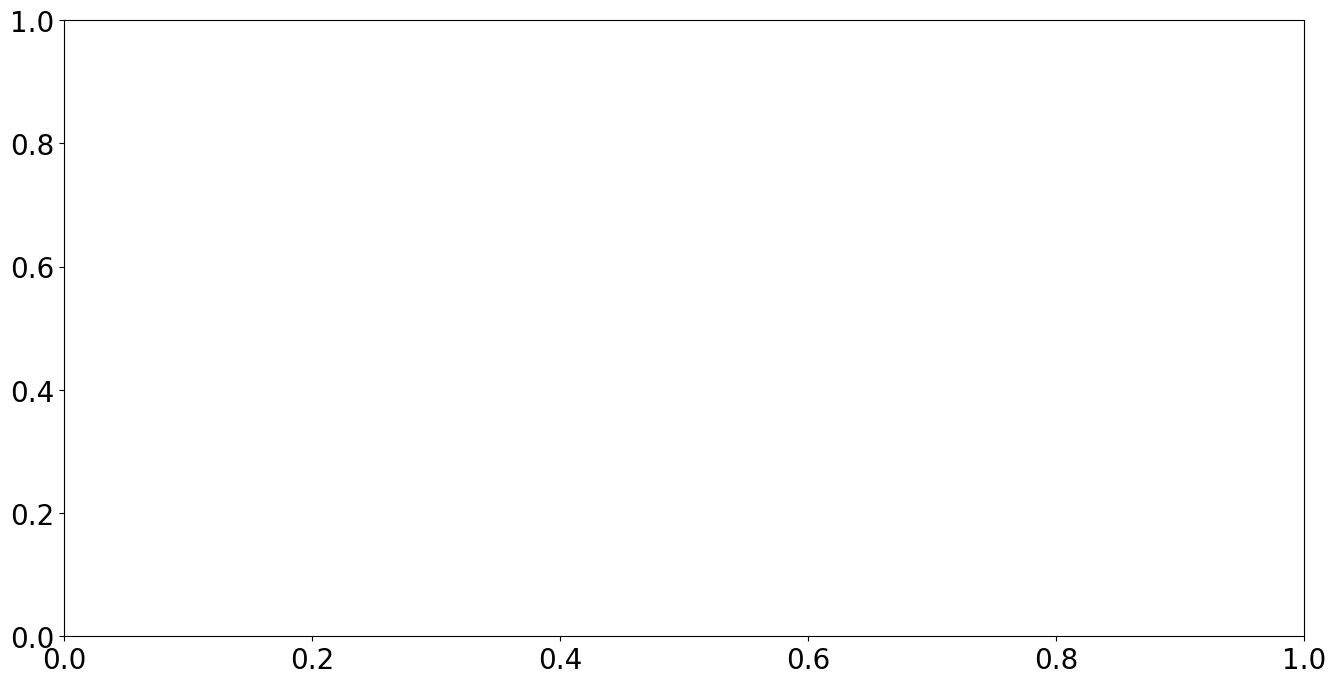

In [11]:
plt.rcParams['figure.figsize'] = [16, 8]
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, 1001)
#plt.plot(epochs, acc_values[::1], 'bo', label='Training loss')
plt.plot(epochs, val_acc_values[::1], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.ylim(0, 1.1)
#plt.xlim(0, 2000)
plt.legend()
plt.show()

In [8]:
def getAccResult(history):
    history_dict = history.history
    val_acc_values = history_dict['val_accuracy']
    print(max(val_acc_values), val_acc_values.index(max(val_acc_values)))

In [13]:
getAccResult(his_1)
# getAccResult(his_01)
# getAccResult(his_001)
getAccResult(his_1_norm)
# getAccResult(his_01_norm)
# getAccResult(his_001_norm)

0.44117647409439087 1
1.0 17


In [6]:
def getHisAcc(history):
    history_dict = history.history
    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    return acc_values, val_acc_values

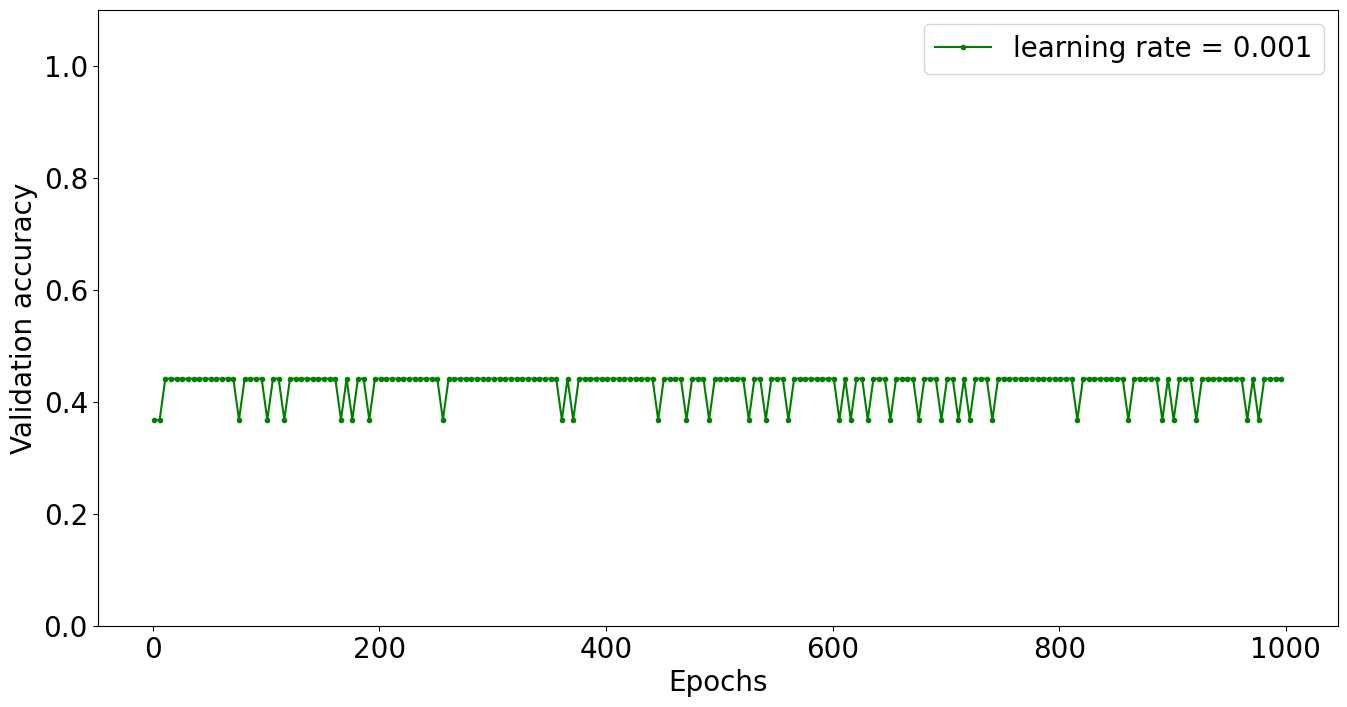

In [15]:
plt.rcParams['figure.figsize'] = [16, 8]
acc_values, val_acc_values = getHisAcc(his_1)
epochs = range(1, 1001, 5)
#plt.plot(epochs, acc_values[::1], 'bo', label='Training loss')
# plt.plot(epochs, val_acc_values[::5], 'orange', label='learning rate = 0.1', linestyle='dashed')
# acc_values, val_acc_values = getHisAcc(his_01)
# plt.plot(epochs, val_acc_values[::5], 'magenta', label='learning rate = 0.01')
# acc_values, val_acc_values = getHisAcc(his_001)
plt.plot(epochs, val_acc_values[::5], 'g', label='learning rate = 0.001', marker='.')
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')
#plt.yscale('log')
plt.ylim(0, 1.1)
#plt.xlim(0, 2000)
plt.legend()
plt.savefig('../pics/ANN/learning_rate_diff.svg', bbox_inches='tight')
plt.savefig('../pics/ANN/learning_rate_diff.pdf', bbox_inches='tight')
plt.show()

In [78]:
X_train, y_train, X_valid, y_valid = getDataNormalization(50)
his_50_sigmoid = runANN('sigmoid', 100, 0.01, X_train, y_train, X_valid, y_valid, True)
his_50_tanh = runANN('tanh', 100, 0.01, X_train, y_train, X_valid, y_valid, True)
his_50_linear = runANN('relu', 100, 0.01, X_train, y_train, X_valid, y_valid, True)
X_train, y_train, X_valid, y_valid = getDataNormalization(110)
his_110_sigmoid = runANN('sigmoid', 100, 0.01, X_train, y_train, X_valid, y_valid, True)
his_110_tanh = runANN('tanh', 100, 0.01, X_train, y_train, X_valid, y_valid, True)
his_110_linear = runANN('relu', 100, 0.01, X_train, y_train, X_valid, y_valid, True)
X_train, y_train, X_valid, y_valid = getDataNormalization(170)
his_170_sigmoid = runANN('sigmoid', 100, 0.01, X_train, y_train, X_valid, y_valid, True)
his_170_tanh = runANN('tanh', 100, 0.01, X_train, y_train, X_valid, y_valid, True)
his_170_linear = runANN('relu', 100, 0.01, X_train, y_train, X_valid, y_valid, True)

Epoch 1/100
4/4 [==============================] - 1s 82ms/step - loss: 1.2769 - accuracy: 0.4000 - val_loss: 1.1810 - val_accuracy: 0.1912
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 0.3579 - accuracy: 0.9400 - val_loss: 1.1025 - val_accuracy: 0.1912
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 0.2217 - accuracy: 0.9200 - val_loss: 1.0316 - val_accuracy: 0.2206
Epoch 4/100
4/4 [==============================] - 0s 14ms/step - loss: 0.1058 - accuracy: 1.0000 - val_loss: 0.9812 - val_accuracy: 0.5588
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 0.1743 - accuracy: 0.9800 - val_loss: 0.9407 - val_accuracy: 0.6618
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 0.1665 - accuracy: 0.9600 - val_loss: 0.9100 - val_accuracy: 0.6912
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0965 - accuracy: 0.9600 - val_loss: 0.8860 - val_accuracy: 0.6912
Epoch 8/100
4/4 [===

4/4 [==============================] - 0s 9ms/step - loss: 0.1008 - accuracy: 0.9800 - val_loss: 0.1079 - val_accuracy: 0.9853
Epoch 18/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0955 - accuracy: 0.9800 - val_loss: 0.1071 - val_accuracy: 0.9853
Epoch 19/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0722 - accuracy: 1.0000 - val_loss: 0.1064 - val_accuracy: 0.9853
Epoch 20/100
4/4 [==============================] - 0s 12ms/step - loss: 0.1074 - accuracy: 0.9600 - val_loss: 0.0964 - val_accuracy: 0.9853
Epoch 21/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0579 - accuracy: 1.0000 - val_loss: 0.0873 - val_accuracy: 1.0000
Epoch 22/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0259 - accuracy: 1.0000 - val_loss: 0.0841 - val_accuracy: 0.9853
Epoch 23/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0465 - accuracy: 1.0000 - val_loss: 0.0756 - val_accuracy: 0.9853
Epoch 24/100
4/4 [=========

4/4 [==============================] - 0s 11ms/step - loss: 0.1418 - accuracy: 0.9800 - val_loss: 0.1026 - val_accuracy: 0.9706
Epoch 34/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0442 - accuracy: 0.9800 - val_loss: 0.1032 - val_accuracy: 0.9706
Epoch 35/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0661 - accuracy: 0.9800 - val_loss: 0.1090 - val_accuracy: 0.9706
Epoch 36/100
4/4 [==============================] - 0s 13ms/step - loss: 0.1587 - accuracy: 0.9600 - val_loss: 0.1137 - val_accuracy: 0.9706
Epoch 37/100
4/4 [==============================] - 0s 13ms/step - loss: 0.1769 - accuracy: 0.9800 - val_loss: 0.1152 - val_accuracy: 0.9706
Epoch 38/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0625 - accuracy: 0.9800 - val_loss: 0.1190 - val_accuracy: 0.9706
Epoch 39/100
4/4 [==============================] - 0s 13ms/step - loss: 0.1473 - accuracy: 0.9400 - val_loss: 0.1183 - val_accuracy: 0.9706
Epoch 40/100
4/4 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.0264 - accuracy: 0.9818 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 50/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0559 - accuracy: 0.9818 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 51/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0281 - val_accuracy: 0.9853
Epoch 52/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.0526 - val_accuracy: 0.9706
Epoch 53/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.0474 - val_accuracy: 0.9706
Epoch 54/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.0326 - val_accuracy: 0.9706
Epoch 55/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0493 - accuracy: 0.9818 - val_loss: 0.0320 - val_accuracy: 0.9853
Epoch 56/100
7/7 [===============

7/7 [==============================] - 0s 7ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 66/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0273 - accuracy: 0.9909 - val_loss: 0.0428 - val_accuracy: 0.9706
Epoch 67/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0195 - accuracy: 0.9909 - val_loss: 0.1594 - val_accuracy: 0.9559
Epoch 68/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.1957 - val_accuracy: 0.9559
Epoch 69/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.1707 - val_accuracy: 0.9559
Epoch 70/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1299 - val_accuracy: 0.9559
Epoch 71/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0991 - val_accuracy: 0.9706
Epoch 72/100
7/7 [===============

Epoch 23/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0368 - accuracy: 0.9818 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 24/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0160 - val_accuracy: 0.9853
Epoch 25/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.0195 - val_accuracy: 0.9853
Epoch 26/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0204 - val_accuracy: 0.9853
Epoch 27/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0577 - accuracy: 0.9727 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 28/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 29/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0236 - val_accuracy: 0.9853
Epoch 30/100
7/7 [==

Epoch 81/100
7/7 [==============================] - 0s 7ms/step - loss: 6.2605e-04 - accuracy: 1.0000 - val_loss: 7.9171e-04 - val_accuracy: 1.0000
Epoch 82/100
7/7 [==============================] - 0s 7ms/step - loss: 4.7985e-04 - accuracy: 1.0000 - val_loss: 7.5469e-04 - val_accuracy: 1.0000
Epoch 83/100
7/7 [==============================] - 0s 8ms/step - loss: 1.0975e-04 - accuracy: 1.0000 - val_loss: 7.3379e-04 - val_accuracy: 1.0000
Epoch 84/100
7/7 [==============================] - 0s 7ms/step - loss: 8.6859e-04 - accuracy: 1.0000 - val_loss: 7.1997e-04 - val_accuracy: 1.0000
Epoch 85/100
7/7 [==============================] - 0s 8ms/step - loss: 1.2664e-04 - accuracy: 1.0000 - val_loss: 7.0825e-04 - val_accuracy: 1.0000
Epoch 86/100
7/7 [==============================] - 0s 7ms/step - loss: 7.0831e-05 - accuracy: 1.0000 - val_loss: 7.0613e-04 - val_accuracy: 1.0000
Epoch 87/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 6.

11/11 [==============================] - 0s 5ms/step - loss: 0.0093 - accuracy: 0.9941 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 39/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0206 - accuracy: 0.9882 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 40/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0192 - accuracy: 0.9941 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 41/100
11/11 [==============================] - 0s 5ms/step - loss: 0.1109 - accuracy: 0.9647 - val_loss: 0.0188 - val_accuracy: 0.9853
Epoch 42/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0738 - accuracy: 0.9824 - val_loss: 0.0890 - val_accuracy: 0.9559
Epoch 43/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0148 - accuracy: 0.9941 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 44/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0687 - accuracy: 0.9882 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 45/100
11/11 

Epoch 96/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 3.4464e-04 - val_accuracy: 1.0000
Epoch 97/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 6.2922e-04 - val_accuracy: 1.0000
Epoch 98/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 7.3755e-04 - val_accuracy: 1.0000
Epoch 99/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 8.4352e-04 - val_accuracy: 1.0000
Epoch 100/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 7.2712e-04 - val_accuracy: 1.0000
Epoch 1/100
11/11 [==============================] - 1s 26ms/step - loss: 0.8292 - accuracy: 0.7412 - val_loss: 0.2939 - val_accuracy: 0.9706
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 0.1160 - accuracy: 0.9706 - val_loss: 0.1132 - val_acc

11/11 [==============================] - 0s 5ms/step - loss: 0.0318 - accuracy: 0.9941 - val_loss: 0.0472 - val_accuracy: 1.0000
Epoch 10/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0184 - accuracy: 0.9941 - val_loss: 0.0332 - val_accuracy: 1.0000
Epoch 11/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0279 - accuracy: 0.9941 - val_loss: 0.0350 - val_accuracy: 1.0000
Epoch 12/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.0241 - val_accuracy: 1.0000
Epoch 13/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.9941 - val_loss: 0.0232 - val_accuracy: 1.0000
Epoch 14/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 15/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0265 - accuracy: 0.9882 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 16/100
11/11 

In [81]:
getAccResult(his_50_sigmoid)
getAccResult(his_50_tanh)
getAccResult(his_50_linear)
getAccResult(his_110_sigmoid)
getAccResult(his_110_tanh)
getAccResult(his_110_linear)
getAccResult(his_170_sigmoid)
getAccResult(his_170_tanh)
getAccResult(his_170_linear)

0.9852941036224365 97
1.0 12
0.970588207244873 19
1.0 2
1.0 7
1.0 8
1.0 12
1.0 2
1.0 3


In [83]:
X_train, y_train, X_valid, y_valid = getData(50)
his_50_sigmoid = runANN('sigmoid', 300, 0.01, X_train, y_train, X_valid, y_valid)
his_50_tanh = runANN('tanh', 300, 0.01, X_train, y_train, X_valid, y_valid)
his_50_linear = runANN('relu', 300, 0.01, X_train, y_train, X_valid, y_valid)
X_train, y_train, X_valid, y_valid = getData(110)
his_110_sigmoid = runANN('sigmoid', 300, 0.01, X_train, y_train, X_valid, y_valid)
his_110_tanh = runANN('tanh', 300, 0.01, X_train, y_train, X_valid, y_valid)
his_110_linear = runANN('relu', 300, 0.01, X_train, y_train, X_valid, y_valid)
X_train, y_train, X_valid, y_valid = getData(170)
his_170_sigmoid = runANN('sigmoid', 300, 0.01, X_train, y_train, X_valid, y_valid)
his_170_tanh = runANN('tanh', 300, 0.01, X_train, y_train, X_valid, y_valid)
his_170_linear = runANN('relu', 300, 0.01, X_train, y_train, X_valid, y_valid)

Epoch 1/300
4/4 [==============================] - 1s 67ms/step - loss: 1.2087 - accuracy: 0.2200 - val_loss: 1.1061 - val_accuracy: 0.3676
Epoch 2/300
4/4 [==============================] - 0s 12ms/step - loss: 1.1013 - accuracy: 0.2800 - val_loss: 1.0551 - val_accuracy: 0.4412
Epoch 3/300
4/4 [==============================] - 0s 13ms/step - loss: 1.0573 - accuracy: 0.4400 - val_loss: 1.0455 - val_accuracy: 0.4412
Epoch 4/300
4/4 [==============================] - 0s 13ms/step - loss: 1.0730 - accuracy: 0.4400 - val_loss: 1.0528 - val_accuracy: 0.4412
Epoch 5/300
4/4 [==============================] - 0s 14ms/step - loss: 1.0821 - accuracy: 0.4400 - val_loss: 1.0572 - val_accuracy: 0.4412
Epoch 6/300
4/4 [==============================] - 0s 13ms/step - loss: 1.1000 - accuracy: 0.4400 - val_loss: 1.0726 - val_accuracy: 0.4412
Epoch 7/300
4/4 [==============================] - 0s 12ms/step - loss: 1.0969 - accuracy: 0.4400 - val_loss: 1.0706 - val_accuracy: 0.4412
Epoch 8/300
4/4 [===

4/4 [==============================] - 0s 11ms/step - loss: 1.0761 - accuracy: 0.4400 - val_loss: 1.0473 - val_accuracy: 0.4412
Epoch 118/300
4/4 [==============================] - 0s 11ms/step - loss: 1.0715 - accuracy: 0.4400 - val_loss: 1.0527 - val_accuracy: 0.4412
Epoch 119/300
4/4 [==============================] - 0s 12ms/step - loss: 1.0628 - accuracy: 0.4400 - val_loss: 1.0540 - val_accuracy: 0.4412
Epoch 120/300
4/4 [==============================] - 0s 10ms/step - loss: 1.0633 - accuracy: 0.4400 - val_loss: 1.0575 - val_accuracy: 0.4412
Epoch 121/300
4/4 [==============================] - 0s 11ms/step - loss: 1.0687 - accuracy: 0.4400 - val_loss: 1.0616 - val_accuracy: 0.4412
Epoch 122/300
4/4 [==============================] - 0s 12ms/step - loss: 1.0663 - accuracy: 0.4400 - val_loss: 1.0622 - val_accuracy: 0.4412
Epoch 123/300
4/4 [==============================] - 0s 11ms/step - loss: 1.0713 - accuracy: 0.4400 - val_loss: 1.0647 - val_accuracy: 0.4412
Epoch 124/300
4/4 [=

Epoch 175/300
4/4 [==============================] - 0s 9ms/step - loss: 1.0623 - accuracy: 0.4400 - val_loss: 1.0510 - val_accuracy: 0.4412
Epoch 176/300
4/4 [==============================] - 0s 9ms/step - loss: 1.0626 - accuracy: 0.4400 - val_loss: 1.0530 - val_accuracy: 0.4412
Epoch 177/300
4/4 [==============================] - 0s 12ms/step - loss: 1.0625 - accuracy: 0.4400 - val_loss: 1.0555 - val_accuracy: 0.4412
Epoch 178/300
4/4 [==============================] - 0s 12ms/step - loss: 1.0636 - accuracy: 0.4400 - val_loss: 1.0559 - val_accuracy: 0.4412
Epoch 179/300
4/4 [==============================] - 0s 14ms/step - loss: 1.0640 - accuracy: 0.4400 - val_loss: 1.0568 - val_accuracy: 0.4412
Epoch 180/300
4/4 [==============================] - 0s 12ms/step - loss: 1.0640 - accuracy: 0.4400 - val_loss: 1.0544 - val_accuracy: 0.4412
Epoch 181/300
4/4 [==============================] - 0s 11ms/step - loss: 1.0625 - accuracy: 0.4400 - val_loss: 1.0514 - val_accuracy: 0.4412
Epoch 18

Epoch 233/300
4/4 [==============================] - 0s 10ms/step - loss: 1.0615 - accuracy: 0.4400 - val_loss: 1.0503 - val_accuracy: 0.4412
Epoch 234/300
4/4 [==============================] - 0s 12ms/step - loss: 1.0650 - accuracy: 0.4400 - val_loss: 1.0542 - val_accuracy: 0.4412
Epoch 235/300
4/4 [==============================] - 0s 13ms/step - loss: 1.0631 - accuracy: 0.4400 - val_loss: 1.0567 - val_accuracy: 0.4412
Epoch 236/300
4/4 [==============================] - 0s 12ms/step - loss: 1.0643 - accuracy: 0.4400 - val_loss: 1.0588 - val_accuracy: 0.4412
Epoch 237/300
4/4 [==============================] - 0s 12ms/step - loss: 1.0657 - accuracy: 0.4400 - val_loss: 1.0590 - val_accuracy: 0.4412
Epoch 238/300
4/4 [==============================] - 0s 11ms/step - loss: 1.0667 - accuracy: 0.4400 - val_loss: 1.0610 - val_accuracy: 0.4412
Epoch 239/300
4/4 [==============================] - 0s 13ms/step - loss: 1.0743 - accuracy: 0.4400 - val_loss: 1.0632 - val_accuracy: 0.4412
Epoch 

Epoch 291/300
4/4 [==============================] - 0s 10ms/step - loss: 1.0682 - accuracy: 0.4400 - val_loss: 1.0534 - val_accuracy: 0.4412
Epoch 292/300
4/4 [==============================] - 0s 11ms/step - loss: 1.0684 - accuracy: 0.4400 - val_loss: 1.0519 - val_accuracy: 0.4412
Epoch 293/300
4/4 [==============================] - 0s 12ms/step - loss: 1.0686 - accuracy: 0.4400 - val_loss: 1.0495 - val_accuracy: 0.4412
Epoch 294/300
4/4 [==============================] - 0s 11ms/step - loss: 1.0665 - accuracy: 0.4400 - val_loss: 1.0478 - val_accuracy: 0.4412
Epoch 295/300
4/4 [==============================] - 0s 12ms/step - loss: 1.0649 - accuracy: 0.4400 - val_loss: 1.0470 - val_accuracy: 0.4412
Epoch 296/300
4/4 [==============================] - 0s 11ms/step - loss: 1.0659 - accuracy: 0.4400 - val_loss: 1.0464 - val_accuracy: 0.4412
Epoch 297/300
4/4 [==============================] - 0s 12ms/step - loss: 1.0623 - accuracy: 0.4400 - val_loss: 1.0455 - val_accuracy: 0.4412
Epoch 

4/4 [==============================] - 0s 11ms/step - loss: 1.0673 - accuracy: 0.4400 - val_loss: 1.0690 - val_accuracy: 0.4412
Epoch 108/300
4/4 [==============================] - 0s 11ms/step - loss: 1.0711 - accuracy: 0.4400 - val_loss: 1.0811 - val_accuracy: 0.4412
Epoch 109/300
4/4 [==============================] - 0s 11ms/step - loss: 1.0839 - accuracy: 0.4400 - val_loss: 1.0870 - val_accuracy: 0.4412
Epoch 110/300
4/4 [==============================] - 0s 12ms/step - loss: 1.0847 - accuracy: 0.4400 - val_loss: 1.0784 - val_accuracy: 0.4412
Epoch 111/300
4/4 [==============================] - 0s 12ms/step - loss: 1.0714 - accuracy: 0.4400 - val_loss: 1.0580 - val_accuracy: 0.4412
Epoch 112/300
4/4 [==============================] - 0s 13ms/step - loss: 1.0658 - accuracy: 0.4400 - val_loss: 1.0488 - val_accuracy: 0.4412
Epoch 113/300
4/4 [==============================] - 0s 13ms/step - loss: 1.0778 - accuracy: 0.4400 - val_loss: 1.0593 - val_accuracy: 0.4412
Epoch 114/300
4/4 [=

Epoch 165/300
4/4 [==============================] - 0s 13ms/step - loss: 1.0721 - accuracy: 0.3400 - val_loss: 1.0537 - val_accuracy: 0.4412
Epoch 166/300
4/4 [==============================] - 0s 12ms/step - loss: 1.0673 - accuracy: 0.4400 - val_loss: 1.0535 - val_accuracy: 0.4412
Epoch 167/300
4/4 [==============================] - 0s 12ms/step - loss: 1.0627 - accuracy: 0.4400 - val_loss: 1.0576 - val_accuracy: 0.4412
Epoch 168/300
4/4 [==============================] - 0s 12ms/step - loss: 1.0653 - accuracy: 0.4400 - val_loss: 1.0616 - val_accuracy: 0.4412
Epoch 169/300
4/4 [==============================] - 0s 11ms/step - loss: 1.0712 - accuracy: 0.4400 - val_loss: 1.0564 - val_accuracy: 0.4412
Epoch 170/300
4/4 [==============================] - 0s 13ms/step - loss: 1.0609 - accuracy: 0.4400 - val_loss: 1.0500 - val_accuracy: 0.4412
Epoch 171/300
4/4 [==============================] - 0s 13ms/step - loss: 1.0606 - accuracy: 0.4400 - val_loss: 1.0528 - val_accuracy: 0.4412
Epoch 

Epoch 223/300
4/4 [==============================] - 0s 11ms/step - loss: 1.0715 - accuracy: 0.4400 - val_loss: 1.0732 - val_accuracy: 0.4412
Epoch 224/300
4/4 [==============================] - 0s 11ms/step - loss: 1.0756 - accuracy: 0.4400 - val_loss: 1.0767 - val_accuracy: 0.4412
Epoch 225/300
4/4 [==============================] - 0s 12ms/step - loss: 1.0769 - accuracy: 0.4400 - val_loss: 1.0718 - val_accuracy: 0.4412
Epoch 226/300
4/4 [==============================] - 0s 13ms/step - loss: 1.0720 - accuracy: 0.4400 - val_loss: 1.0594 - val_accuracy: 0.4412
Epoch 227/300
4/4 [==============================] - 0s 13ms/step - loss: 1.0679 - accuracy: 0.4400 - val_loss: 1.0581 - val_accuracy: 0.4412
Epoch 228/300
4/4 [==============================] - 0s 13ms/step - loss: 1.0656 - accuracy: 0.4400 - val_loss: 1.0631 - val_accuracy: 0.4412
Epoch 229/300
4/4 [==============================] - 0s 12ms/step - loss: 1.0724 - accuracy: 0.4400 - val_loss: 1.0648 - val_accuracy: 0.4412
Epoch 

Epoch 281/300
4/4 [==============================] - 0s 11ms/step - loss: 1.0759 - accuracy: 0.4400 - val_loss: 1.0759 - val_accuracy: 0.4412
Epoch 282/300
4/4 [==============================] - 0s 13ms/step - loss: 1.0764 - accuracy: 0.4400 - val_loss: 1.0795 - val_accuracy: 0.4412
Epoch 283/300
4/4 [==============================] - 0s 11ms/step - loss: 1.0799 - accuracy: 0.4400 - val_loss: 1.0658 - val_accuracy: 0.4412
Epoch 284/300
4/4 [==============================] - 0s 11ms/step - loss: 1.0702 - accuracy: 0.4400 - val_loss: 1.0635 - val_accuracy: 0.4412
Epoch 285/300
4/4 [==============================] - 0s 12ms/step - loss: 1.0676 - accuracy: 0.4400 - val_loss: 1.0649 - val_accuracy: 0.4412
Epoch 286/300
4/4 [==============================] - 0s 12ms/step - loss: 1.0715 - accuracy: 0.4400 - val_loss: 1.0679 - val_accuracy: 0.4412
Epoch 287/300
4/4 [==============================] - 0s 12ms/step - loss: 1.0719 - accuracy: 0.4400 - val_loss: 1.0562 - val_accuracy: 0.4412
Epoch 

Epoch 96/300
4/4 [==============================] - 0s 10ms/step - loss: 15.0777 - accuracy: 0.5600 - val_loss: 35.3938 - val_accuracy: 0.4412
Epoch 97/300
4/4 [==============================] - 0s 12ms/step - loss: 26.7765 - accuracy: 0.4200 - val_loss: 29.6584 - val_accuracy: 0.3824
Epoch 98/300
4/4 [==============================] - 0s 13ms/step - loss: 40.8155 - accuracy: 0.3400 - val_loss: 12.0308 - val_accuracy: 0.4853
Epoch 99/300
4/4 [==============================] - 0s 12ms/step - loss: 31.6954 - accuracy: 0.2800 - val_loss: 6.6386 - val_accuracy: 0.4853
Epoch 100/300
4/4 [==============================] - 0s 11ms/step - loss: 27.2340 - accuracy: 0.3800 - val_loss: 30.2422 - val_accuracy: 0.3676
Epoch 101/300
4/4 [==============================] - 0s 12ms/step - loss: 21.0887 - accuracy: 0.5200 - val_loss: 30.3999 - val_accuracy: 0.4412
Epoch 102/300
4/4 [==============================] - 0s 13ms/step - loss: 18.1210 - accuracy: 0.4800 - val_loss: 12.2333 - val_accuracy: 0.38

Epoch 211/300
4/4 [==============================] - 0s 11ms/step - loss: 2.0318 - accuracy: 0.4800 - val_loss: 1.1123 - val_accuracy: 0.7206
Epoch 212/300
4/4 [==============================] - 0s 11ms/step - loss: 1.4377 - accuracy: 0.7000 - val_loss: 0.8377 - val_accuracy: 0.7059
Epoch 213/300
4/4 [==============================] - 0s 12ms/step - loss: 1.0294 - accuracy: 0.6200 - val_loss: 1.7942 - val_accuracy: 0.6471
Epoch 214/300
4/4 [==============================] - 0s 11ms/step - loss: 2.6966 - accuracy: 0.6400 - val_loss: 1.0274 - val_accuracy: 0.6324
Epoch 215/300
4/4 [==============================] - 0s 10ms/step - loss: 1.5645 - accuracy: 0.7400 - val_loss: 1.4859 - val_accuracy: 0.6324
Epoch 216/300
4/4 [==============================] - 0s 11ms/step - loss: 1.1319 - accuracy: 0.6800 - val_loss: 2.8136 - val_accuracy: 0.6324
Epoch 217/300
4/4 [==============================] - 0s 12ms/step - loss: 3.1936 - accuracy: 0.6000 - val_loss: 0.8402 - val_accuracy: 0.6912
Epoch 

7/7 [==============================] - 0s 6ms/step - loss: 1.0652 - accuracy: 0.4364 - val_loss: 1.0481 - val_accuracy: 0.4412
Epoch 27/300
7/7 [==============================] - 0s 6ms/step - loss: 1.0597 - accuracy: 0.4364 - val_loss: 1.0478 - val_accuracy: 0.4412
Epoch 28/300
7/7 [==============================] - 0s 7ms/step - loss: 1.0598 - accuracy: 0.4364 - val_loss: 1.0477 - val_accuracy: 0.4412
Epoch 29/300
7/7 [==============================] - 0s 7ms/step - loss: 1.0591 - accuracy: 0.4364 - val_loss: 1.0459 - val_accuracy: 0.4412
Epoch 30/300
7/7 [==============================] - 0s 7ms/step - loss: 1.0628 - accuracy: 0.4364 - val_loss: 1.0469 - val_accuracy: 0.4412
Epoch 31/300
7/7 [==============================] - 0s 6ms/step - loss: 1.0598 - accuracy: 0.4364 - val_loss: 1.0479 - val_accuracy: 0.4412
Epoch 32/300
7/7 [==============================] - 0s 7ms/step - loss: 1.0682 - accuracy: 0.4364 - val_loss: 1.0518 - val_accuracy: 0.4412
Epoch 33/300
7/7 [===============

7/7 [==============================] - 0s 7ms/step - loss: 1.0594 - accuracy: 0.4364 - val_loss: 1.0462 - val_accuracy: 0.4412
Epoch 143/300
7/7 [==============================] - 0s 7ms/step - loss: 1.0578 - accuracy: 0.4364 - val_loss: 1.0463 - val_accuracy: 0.4412
Epoch 144/300
7/7 [==============================] - 0s 7ms/step - loss: 1.0646 - accuracy: 0.4364 - val_loss: 1.0476 - val_accuracy: 0.4412
Epoch 145/300
7/7 [==============================] - 0s 7ms/step - loss: 1.0589 - accuracy: 0.4364 - val_loss: 1.0458 - val_accuracy: 0.4412
Epoch 146/300
7/7 [==============================] - 0s 7ms/step - loss: 1.0580 - accuracy: 0.4364 - val_loss: 1.0476 - val_accuracy: 0.4412
Epoch 147/300
7/7 [==============================] - 0s 7ms/step - loss: 1.0609 - accuracy: 0.4364 - val_loss: 1.0484 - val_accuracy: 0.4412
Epoch 148/300
7/7 [==============================] - 0s 7ms/step - loss: 1.0584 - accuracy: 0.4364 - val_loss: 1.0461 - val_accuracy: 0.4412
Epoch 149/300
7/7 [========

7/7 [==============================] - 0s 7ms/step - loss: 1.0585 - accuracy: 0.4364 - val_loss: 1.0467 - val_accuracy: 0.4412
Epoch 259/300
7/7 [==============================] - 0s 7ms/step - loss: 1.0577 - accuracy: 0.4364 - val_loss: 1.0469 - val_accuracy: 0.4412
Epoch 260/300
7/7 [==============================] - 0s 7ms/step - loss: 1.0596 - accuracy: 0.4364 - val_loss: 1.0465 - val_accuracy: 0.4412
Epoch 261/300
7/7 [==============================] - 0s 7ms/step - loss: 1.0582 - accuracy: 0.4364 - val_loss: 1.0466 - val_accuracy: 0.4412
Epoch 262/300
7/7 [==============================] - 0s 7ms/step - loss: 1.0574 - accuracy: 0.4364 - val_loss: 1.0463 - val_accuracy: 0.4412
Epoch 263/300
7/7 [==============================] - 0s 7ms/step - loss: 1.0580 - accuracy: 0.4364 - val_loss: 1.0459 - val_accuracy: 0.4412
Epoch 264/300
7/7 [==============================] - 0s 7ms/step - loss: 1.0581 - accuracy: 0.4364 - val_loss: 1.0461 - val_accuracy: 0.4412
Epoch 265/300
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 1.0598 - accuracy: 0.4364 - val_loss: 1.0459 - val_accuracy: 0.4412
Epoch 75/300
7/7 [==============================] - 0s 7ms/step - loss: 1.0607 - accuracy: 0.4364 - val_loss: 1.0474 - val_accuracy: 0.4412
Epoch 76/300
7/7 [==============================] - 0s 8ms/step - loss: 1.0615 - accuracy: 0.4364 - val_loss: 1.0454 - val_accuracy: 0.4412
Epoch 77/300
7/7 [==============================] - 0s 8ms/step - loss: 1.0582 - accuracy: 0.4364 - val_loss: 1.0455 - val_accuracy: 0.4412
Epoch 78/300
7/7 [==============================] - 0s 8ms/step - loss: 1.0581 - accuracy: 0.4364 - val_loss: 1.0466 - val_accuracy: 0.4412
Epoch 79/300
7/7 [==============================] - 0s 7ms/step - loss: 1.0596 - accuracy: 0.4364 - val_loss: 1.0464 - val_accuracy: 0.4412
Epoch 80/300
7/7 [==============================] - 0s 7ms/step - loss: 1.0620 - accuracy: 0.4364 - val_loss: 1.0506 - val_accuracy: 0.4412
Epoch 81/300
7/7 [===============

7/7 [==============================] - 0s 7ms/step - loss: 1.0643 - accuracy: 0.4364 - val_loss: 1.0475 - val_accuracy: 0.4412
Epoch 191/300
7/7 [==============================] - 0s 6ms/step - loss: 1.0607 - accuracy: 0.4364 - val_loss: 1.0470 - val_accuracy: 0.4412
Epoch 192/300
7/7 [==============================] - 0s 6ms/step - loss: 1.0633 - accuracy: 0.4364 - val_loss: 1.0469 - val_accuracy: 0.4412
Epoch 193/300
7/7 [==============================] - 0s 6ms/step - loss: 1.0583 - accuracy: 0.4364 - val_loss: 1.0469 - val_accuracy: 0.4412
Epoch 194/300
7/7 [==============================] - 0s 7ms/step - loss: 1.0619 - accuracy: 0.4364 - val_loss: 1.0482 - val_accuracy: 0.4412
Epoch 195/300
7/7 [==============================] - 0s 7ms/step - loss: 1.0663 - accuracy: 0.4364 - val_loss: 1.0474 - val_accuracy: 0.4412
Epoch 196/300
7/7 [==============================] - 0s 6ms/step - loss: 1.0580 - accuracy: 0.4364 - val_loss: 1.0458 - val_accuracy: 0.4412
Epoch 197/300
7/7 [========

7/7 [==============================] - 0s 9ms/step - loss: 20.4711 - accuracy: 0.3818 - val_loss: 9.6459 - val_accuracy: 0.3676
Epoch 7/300
7/7 [==============================] - 0s 7ms/step - loss: 14.6894 - accuracy: 0.4000 - val_loss: 18.8567 - val_accuracy: 0.1912
Epoch 8/300
7/7 [==============================] - 0s 8ms/step - loss: 15.4529 - accuracy: 0.3909 - val_loss: 7.8115 - val_accuracy: 0.5441
Epoch 9/300
7/7 [==============================] - 0s 7ms/step - loss: 19.1857 - accuracy: 0.4364 - val_loss: 35.0255 - val_accuracy: 0.3676
Epoch 10/300
7/7 [==============================] - 0s 8ms/step - loss: 35.9477 - accuracy: 0.3273 - val_loss: 15.5636 - val_accuracy: 0.6029
Epoch 11/300
7/7 [==============================] - 0s 8ms/step - loss: 27.9443 - accuracy: 0.4182 - val_loss: 22.6487 - val_accuracy: 0.1912
Epoch 12/300
7/7 [==============================] - 0s 7ms/step - loss: 21.8805 - accuracy: 0.3545 - val_loss: 24.2333 - val_accuracy: 0.4412
Epoch 13/300
7/7 [======

7/7 [==============================] - 0s 7ms/step - loss: 2.0235 - accuracy: 0.6545 - val_loss: 1.8144 - val_accuracy: 0.5735
Epoch 123/300
7/7 [==============================] - 0s 7ms/step - loss: 3.1706 - accuracy: 0.6000 - val_loss: 1.6401 - val_accuracy: 0.5441
Epoch 124/300
7/7 [==============================] - 0s 7ms/step - loss: 1.6451 - accuracy: 0.6364 - val_loss: 1.8206 - val_accuracy: 0.6324
Epoch 125/300
7/7 [==============================] - 0s 7ms/step - loss: 2.8401 - accuracy: 0.6545 - val_loss: 2.0623 - val_accuracy: 0.5441
Epoch 126/300
7/7 [==============================] - 0s 7ms/step - loss: 2.9635 - accuracy: 0.7273 - val_loss: 3.3831 - val_accuracy: 0.4559
Epoch 127/300
7/7 [==============================] - 0s 8ms/step - loss: 2.1215 - accuracy: 0.6818 - val_loss: 0.4126 - val_accuracy: 0.8235
Epoch 128/300
7/7 [==============================] - 0s 8ms/step - loss: 0.7336 - accuracy: 0.8182 - val_loss: 0.4092 - val_accuracy: 0.9265
Epoch 129/300
7/7 [========

7/7 [==============================] - 0s 7ms/step - loss: 0.3285 - accuracy: 0.8636 - val_loss: 0.5557 - val_accuracy: 0.8235
Epoch 239/300
7/7 [==============================] - 0s 7ms/step - loss: 0.2397 - accuracy: 0.9182 - val_loss: 1.5715 - val_accuracy: 0.7059
Epoch 240/300
7/7 [==============================] - 0s 7ms/step - loss: 0.4345 - accuracy: 0.8364 - val_loss: 1.1400 - val_accuracy: 0.7941
Epoch 241/300
7/7 [==============================] - 0s 6ms/step - loss: 0.8916 - accuracy: 0.8091 - val_loss: 0.3471 - val_accuracy: 0.8382
Epoch 242/300
7/7 [==============================] - 0s 7ms/step - loss: 0.3221 - accuracy: 0.9091 - val_loss: 0.6350 - val_accuracy: 0.8676
Epoch 243/300
7/7 [==============================] - 0s 6ms/step - loss: 0.1931 - accuracy: 0.9364 - val_loss: 0.2649 - val_accuracy: 0.9118
Epoch 244/300
7/7 [==============================] - 0s 8ms/step - loss: 0.1692 - accuracy: 0.9364 - val_loss: 0.2247 - val_accuracy: 0.9412
Epoch 245/300
7/7 [========

Epoch 54/300
11/11 [==============================] - 0s 5ms/step - loss: 1.0595 - accuracy: 0.3706 - val_loss: 1.0454 - val_accuracy: 0.4412
Epoch 55/300
11/11 [==============================] - 0s 4ms/step - loss: 1.0621 - accuracy: 0.4412 - val_loss: 1.0507 - val_accuracy: 0.4412
Epoch 56/300
11/11 [==============================] - 0s 5ms/step - loss: 1.0614 - accuracy: 0.4412 - val_loss: 1.0517 - val_accuracy: 0.4412
Epoch 57/300
11/11 [==============================] - 0s 5ms/step - loss: 1.0563 - accuracy: 0.4412 - val_loss: 1.0454 - val_accuracy: 0.4412
Epoch 58/300
11/11 [==============================] - 0s 5ms/step - loss: 1.0574 - accuracy: 0.4412 - val_loss: 1.0467 - val_accuracy: 0.4412
Epoch 59/300
11/11 [==============================] - 0s 5ms/step - loss: 1.0576 - accuracy: 0.4412 - val_loss: 1.0462 - val_accuracy: 0.4412
Epoch 60/300
11/11 [==============================] - 0s 4ms/step - loss: 1.0565 - accuracy: 0.4412 - val_loss: 1.0463 - val_accuracy: 0.4412
Epoch 

11/11 [==============================] - 0s 4ms/step - loss: 1.0523 - accuracy: 0.4412 - val_loss: 1.0459 - val_accuracy: 0.4412
Epoch 169/300
11/11 [==============================] - 0s 5ms/step - loss: 1.0528 - accuracy: 0.4412 - val_loss: 1.0460 - val_accuracy: 0.4412
Epoch 170/300
11/11 [==============================] - 0s 5ms/step - loss: 1.0511 - accuracy: 0.4412 - val_loss: 1.0457 - val_accuracy: 0.4412
Epoch 171/300
11/11 [==============================] - 0s 5ms/step - loss: 1.0531 - accuracy: 0.4412 - val_loss: 1.0456 - val_accuracy: 0.4412
Epoch 172/300
11/11 [==============================] - 0s 5ms/step - loss: 1.0532 - accuracy: 0.4412 - val_loss: 1.0460 - val_accuracy: 0.4412
Epoch 173/300
11/11 [==============================] - 0s 5ms/step - loss: 1.0529 - accuracy: 0.4412 - val_loss: 1.0458 - val_accuracy: 0.4412
Epoch 174/300
11/11 [==============================] - 0s 7ms/step - loss: 1.0525 - accuracy: 0.4412 - val_loss: 1.0452 - val_accuracy: 0.4412
Epoch 175/300

11/11 [==============================] - 0s 5ms/step - loss: 1.0520 - accuracy: 0.4412 - val_loss: 1.0457 - val_accuracy: 0.4412
Epoch 283/300
11/11 [==============================] - 0s 5ms/step - loss: 1.0519 - accuracy: 0.4412 - val_loss: 1.0456 - val_accuracy: 0.4412
Epoch 284/300
11/11 [==============================] - 0s 6ms/step - loss: 1.0529 - accuracy: 0.4412 - val_loss: 1.0458 - val_accuracy: 0.4412
Epoch 285/300
11/11 [==============================] - 0s 5ms/step - loss: 1.0517 - accuracy: 0.4412 - val_loss: 1.0460 - val_accuracy: 0.4412
Epoch 286/300
11/11 [==============================] - 0s 4ms/step - loss: 1.0517 - accuracy: 0.4412 - val_loss: 1.0454 - val_accuracy: 0.4412
Epoch 287/300
11/11 [==============================] - 0s 4ms/step - loss: 1.0520 - accuracy: 0.4412 - val_loss: 1.0454 - val_accuracy: 0.4412
Epoch 288/300
11/11 [==============================] - 0s 5ms/step - loss: 1.0536 - accuracy: 0.4412 - val_loss: 1.0460 - val_accuracy: 0.4412
Epoch 289/300

Epoch 40/300
11/11 [==============================] - 0s 4ms/step - loss: 1.0636 - accuracy: 0.4412 - val_loss: 1.0513 - val_accuracy: 0.4412
Epoch 41/300
11/11 [==============================] - 0s 4ms/step - loss: 1.0525 - accuracy: 0.4412 - val_loss: 1.0455 - val_accuracy: 0.4412
Epoch 42/300
11/11 [==============================] - 0s 5ms/step - loss: 1.0575 - accuracy: 0.4412 - val_loss: 1.0461 - val_accuracy: 0.4412
Epoch 43/300
11/11 [==============================] - 0s 4ms/step - loss: 1.0631 - accuracy: 0.4412 - val_loss: 1.0492 - val_accuracy: 0.4412
Epoch 44/300
11/11 [==============================] - 0s 5ms/step - loss: 1.0553 - accuracy: 0.4412 - val_loss: 1.0512 - val_accuracy: 0.4412
Epoch 45/300
11/11 [==============================] - 0s 4ms/step - loss: 1.0542 - accuracy: 0.4412 - val_loss: 1.0455 - val_accuracy: 0.4412
Epoch 46/300
11/11 [==============================] - 0s 5ms/step - loss: 1.0558 - accuracy: 0.3941 - val_loss: 1.0509 - val_accuracy: 0.3676
Epoch 

Epoch 98/300
11/11 [==============================] - 0s 4ms/step - loss: 1.0550 - accuracy: 0.4412 - val_loss: 1.0462 - val_accuracy: 0.4412
Epoch 99/300
11/11 [==============================] - 0s 4ms/step - loss: 1.0585 - accuracy: 0.4412 - val_loss: 1.0470 - val_accuracy: 0.4412
Epoch 100/300
11/11 [==============================] - 0s 5ms/step - loss: 1.0610 - accuracy: 0.4412 - val_loss: 1.0456 - val_accuracy: 0.4412
Epoch 101/300
11/11 [==============================] - 0s 4ms/step - loss: 1.0557 - accuracy: 0.4412 - val_loss: 1.0454 - val_accuracy: 0.4412
Epoch 102/300
11/11 [==============================] - 0s 5ms/step - loss: 1.0592 - accuracy: 0.4412 - val_loss: 1.0455 - val_accuracy: 0.4412
Epoch 103/300
11/11 [==============================] - 0s 4ms/step - loss: 1.0586 - accuracy: 0.4412 - val_loss: 1.0491 - val_accuracy: 0.4412
Epoch 104/300
11/11 [==============================] - 0s 5ms/step - loss: 1.0505 - accuracy: 0.4412 - val_loss: 1.0463 - val_accuracy: 0.4412
E

11/11 [==============================] - 0s 4ms/step - loss: 1.0589 - accuracy: 0.4412 - val_loss: 1.0453 - val_accuracy: 0.4412
Epoch 213/300
11/11 [==============================] - 0s 4ms/step - loss: 1.0521 - accuracy: 0.4412 - val_loss: 1.0463 - val_accuracy: 0.4412
Epoch 214/300
11/11 [==============================] - 0s 4ms/step - loss: 1.0557 - accuracy: 0.4412 - val_loss: 1.0464 - val_accuracy: 0.4412
Epoch 215/300
11/11 [==============================] - 0s 5ms/step - loss: 1.0531 - accuracy: 0.4412 - val_loss: 1.0459 - val_accuracy: 0.4412
Epoch 216/300
11/11 [==============================] - 0s 5ms/step - loss: 1.0583 - accuracy: 0.4412 - val_loss: 1.0459 - val_accuracy: 0.4412
Epoch 217/300
11/11 [==============================] - 0s 5ms/step - loss: 1.0559 - accuracy: 0.4412 - val_loss: 1.0477 - val_accuracy: 0.4412
Epoch 218/300
11/11 [==============================] - 0s 5ms/step - loss: 1.0561 - accuracy: 0.4412 - val_loss: 1.0481 - val_accuracy: 0.4412
Epoch 219/300

11/11 [==============================] - 0s 5ms/step - loss: 1.6825 - accuracy: 0.5471 - val_loss: 1.3748 - val_accuracy: 0.4412
Epoch 27/300
11/11 [==============================] - 0s 5ms/step - loss: 1.4795 - accuracy: 0.5235 - val_loss: 1.6724 - val_accuracy: 0.4265
Epoch 28/300
11/11 [==============================] - 0s 5ms/step - loss: 1.3038 - accuracy: 0.5765 - val_loss: 2.5500 - val_accuracy: 0.4559
Epoch 29/300
11/11 [==============================] - 0s 5ms/step - loss: 1.6839 - accuracy: 0.4529 - val_loss: 1.2152 - val_accuracy: 0.6618
Epoch 30/300
11/11 [==============================] - 0s 4ms/step - loss: 1.3421 - accuracy: 0.5118 - val_loss: 1.1338 - val_accuracy: 0.5735
Epoch 31/300
11/11 [==============================] - 0s 5ms/step - loss: 1.1446 - accuracy: 0.5647 - val_loss: 1.3742 - val_accuracy: 0.6029
Epoch 32/300
11/11 [==============================] - 0s 5ms/step - loss: 1.9458 - accuracy: 0.5529 - val_loss: 1.3293 - val_accuracy: 0.5882
Epoch 33/300
11/11 

Epoch 84/300
11/11 [==============================] - 0s 4ms/step - loss: 2.0770 - accuracy: 0.4765 - val_loss: 2.5636 - val_accuracy: 0.2647
Epoch 85/300
11/11 [==============================] - 0s 5ms/step - loss: 2.4509 - accuracy: 0.5059 - val_loss: 5.5170 - val_accuracy: 0.3971
Epoch 86/300
11/11 [==============================] - 0s 4ms/step - loss: 3.9291 - accuracy: 0.4588 - val_loss: 2.0089 - val_accuracy: 0.4265
Epoch 87/300
11/11 [==============================] - 0s 4ms/step - loss: 2.3249 - accuracy: 0.4471 - val_loss: 1.0705 - val_accuracy: 0.7059
Epoch 88/300
11/11 [==============================] - 0s 5ms/step - loss: 1.0432 - accuracy: 0.6647 - val_loss: 1.3275 - val_accuracy: 0.5735
Epoch 89/300
11/11 [==============================] - 0s 5ms/step - loss: 1.0416 - accuracy: 0.6235 - val_loss: 0.9016 - val_accuracy: 0.7059
Epoch 90/300
11/11 [==============================] - 0s 5ms/step - loss: 0.7093 - accuracy: 0.7235 - val_loss: 0.8638 - val_accuracy: 0.7059
Epoch 

11/11 [==============================] - 0s 4ms/step - loss: 0.4703 - accuracy: 0.7882 - val_loss: 0.4653 - val_accuracy: 0.7941
Epoch 199/300
11/11 [==============================] - 0s 5ms/step - loss: 0.6401 - accuracy: 0.7353 - val_loss: 0.4644 - val_accuracy: 0.7941
Epoch 200/300
11/11 [==============================] - 0s 5ms/step - loss: 0.8464 - accuracy: 0.7059 - val_loss: 0.7623 - val_accuracy: 0.5882
Epoch 201/300
11/11 [==============================] - 0s 5ms/step - loss: 0.5369 - accuracy: 0.7412 - val_loss: 0.3894 - val_accuracy: 0.8382
Epoch 202/300
11/11 [==============================] - 0s 5ms/step - loss: 0.4511 - accuracy: 0.8118 - val_loss: 0.3884 - val_accuracy: 0.8235
Epoch 203/300
11/11 [==============================] - 0s 5ms/step - loss: 0.5650 - accuracy: 0.7824 - val_loss: 0.3952 - val_accuracy: 0.8382
Epoch 204/300
11/11 [==============================] - 0s 5ms/step - loss: 0.5489 - accuracy: 0.7706 - val_loss: 0.3801 - val_accuracy: 0.8235
Epoch 205/300

In [84]:
getAccResult(his_50_sigmoid)
getAccResult(his_50_tanh)
getAccResult(his_50_linear)
getAccResult(his_110_sigmoid)
getAccResult(his_110_tanh)
getAccResult(his_110_linear)
getAccResult(his_170_sigmoid)
getAccResult(his_170_tanh)
getAccResult(his_170_linear)

0.44117647409439087 1
0.44117647409439087 0
0.7647058963775635 268
0.44117647409439087 0
0.44117647409439087 0
0.9558823704719543 245
0.44117647409439087 1
0.44117647409439087 1
0.9558823704719543 282


In [49]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
X_train.shape

(50, 7)

In [1]:
results = model.evaluate(X_test, y_test)
results

NameError: name 'model' is not defined

In [14]:
import pandas as pd
save_folder = 'train_0.5_valid_0.7_test'
pd.read_csv('../data/data_remove_outliers.csv').sample(frac=1).groupby(['Culmen Length (mm)','Culmen Depth (mm)', 'Flipper Length (mm)']).size().reset_index(name='Count').nunique()

Culmen Length (mm)     164
Culmen Depth (mm)       80
Flipper Length (mm)     55
Count                    1
dtype: int64

In [18]:
a = pd.read_csv('../data/train_0.5_valid_0.7_test/train_data.csv')
b = pd.read_csv('../data/train_0.5_valid_0.7_test/valid_data.csv')
c = pd.read_csv('../data/train_0.5_valid_0.7_test/test_data.csv')
frames = [a, b, c]
df = pd.concat(frames).sample(frac=1)
df.groupby(['Culmen Length (mm)','Culmen Depth (mm)', 'Flipper Length (mm)']).size().reset_index(name='Count').nunique()

Culmen Length (mm)     164
Culmen Depth (mm)       80
Flipper Length (mm)     55
Count                    1
dtype: int64

In [20]:
pd.read_csv('../data/' + save_folder + '/train_data_' + str(50) + '_valid.csv')

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Sex,Species
0,-1.328520,-0.324059,-1.395383,-1.517557,0.647604,-0.329420,0.788672,-1.0
1,-1.511109,-0.548322,-0.426367,-0.948331,-0.278858,-0.430613,0.788672,-1.0
2,-0.762493,0.909384,-0.772444,0.474735,1.386608,2.108277,-1.089118,-1.0
3,-0.214725,-1.949962,0.819511,0.873193,-1.341028,-1.464155,0.788672,1.0
4,0.734739,-1.221109,0.957942,1.670110,-1.423070,0.215572,-1.089118,1.0
...,...,...,...,...,...,...,...,...
63,-0.525127,-1.949962,0.888726,0.531657,-0.935139,0.339621,0.788672,1.0
64,0.552150,-0.380125,-0.841660,-0.606795,1.672598,1.588978,0.788672,0.0
65,-0.926823,1.021516,-0.426367,-0.834486,0.838503,0.786858,0.788672,-1.0
66,-0.178207,-1.669634,0.542649,0.588580,-1.941204,0.243744,0.788672,1.0


ValueError: zero-size array to reduction operation minimum which has no identity

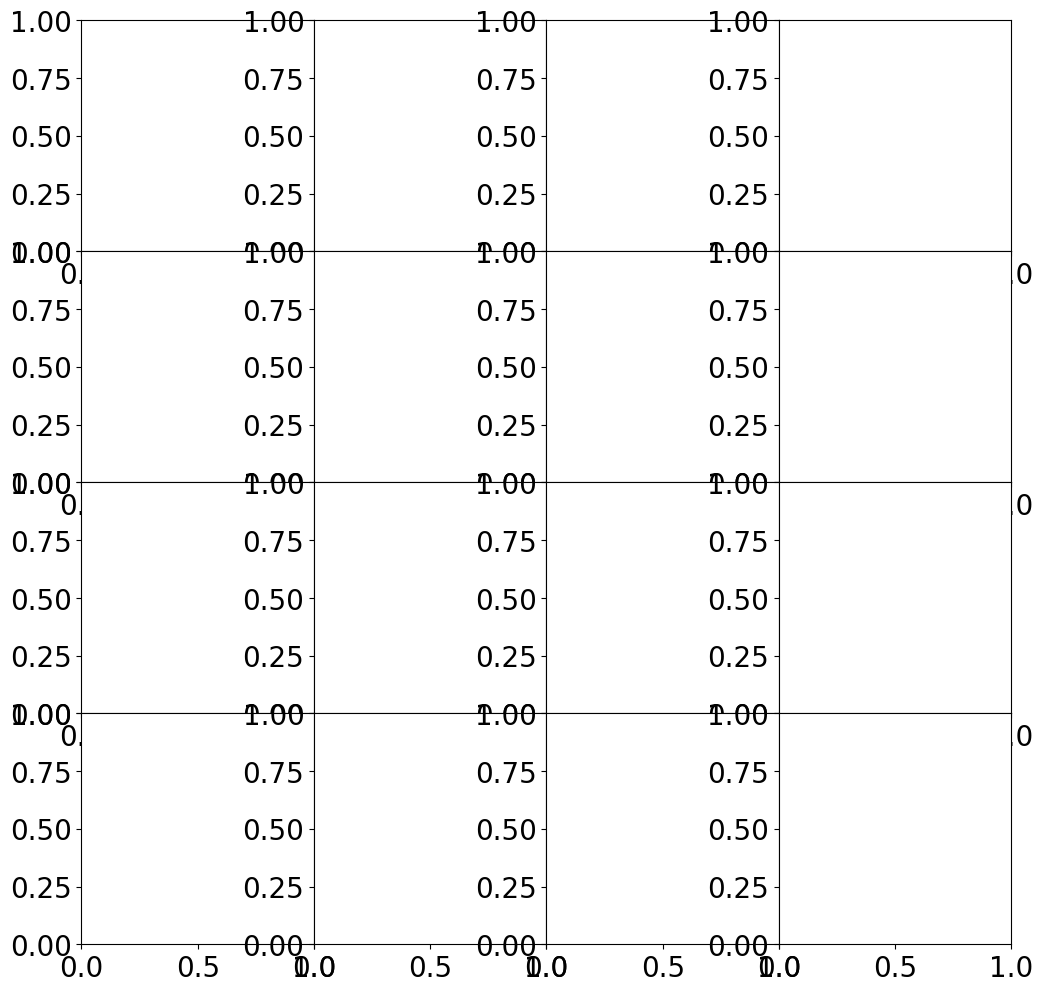

In [20]:
a = pd.read_csv('../data/train_0.5_valid_0.7_test/train_data.csv')
a = a.drop(['Species', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Body Mass (g)'], axis = 1).values
from pandas.plotting import scatter_matrix
df = pd.DataFrame(a, columns = ['a', 'b', 'c', 'd'])
scatter_matrix(df, alpha = 0.2, figsize = (12, 12), diagonal = 'kde')

In [14]:
a = a.drop(['Species', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Body Mass (g)'], axis = 1).values

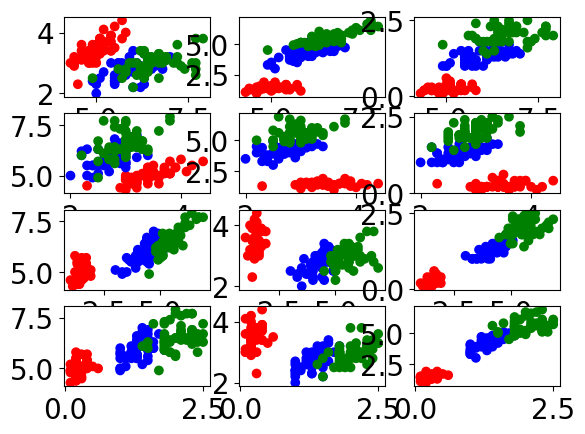

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np

 #setting the shape of the figure in one line as opposed to creating 12 variables
fig, subs = plt.subplots(4,3) 

#code given in Hyperion notes
iris = load_iris()
data = np.array(iris['data'])
targets = np.array(iris['target'])

cd = {0:'r',1:'b',2:"g"}
cols = np.array([cd[target] for target in targets])
#ROW 1
subs[0][0].scatter(data[:,0], data[:,1], c=cols)
subs[0][1].scatter(data[:,0], data[:,2], c=cols)
subs[0][2].scatter(data[:,0], data[:,3], c=cols)
#ROW 2
subs[1][0].scatter(data[:,1], data[:,0], c=cols)
subs[1][1].scatter(data[:,1], data[:,2], c=cols)
subs[1][2].scatter(data[:,1], data[:,3], c=cols)
#ROW 3
subs[2][0].scatter(data[:,2], data[:,0], c=cols)
subs[2][1].scatter(data[:,2], data[:,1], c=cols)
subs[2][2].scatter(data[:,2], data[:,3], c=cols)
#ROW 4
subs[3][0].scatter(data[:,3], data[:,0], c=cols)
subs[3][1].scatter(data[:,3], data[:,1], c=cols)
subs[3][2].scatter(data[:,3], data[:,2], c=cols)
#show data plot
plt.show()

In [27]:
import plotly.express as px
plt.rcParams['figure.figsize'] = [12, 24]
df = px.data.iris()
fig = px.scatter_matrix(a,
    dimensions=["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Sex"],
    color="Species")
fig.show()

In [18]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [23]:
a = pd.read_csv('../data/train_0.5_valid_0.7_test/train_data.csv')
a = a.drop(['Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Body Mass (g)'], axis = 1)
a

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Species
0,47.2,15.5,215.0,1,2
1,36.3,19.5,190.0,0,0
2,37.8,18.3,174.0,1,0
3,46.2,14.1,217.0,1,2
4,35.7,18.0,202.0,1,0
...,...,...,...,...,...
165,46.4,15.0,216.0,1,2
166,35.1,19.4,193.0,0,0
167,37.6,17.0,185.0,1,0
168,36.0,17.8,195.0,1,0


array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

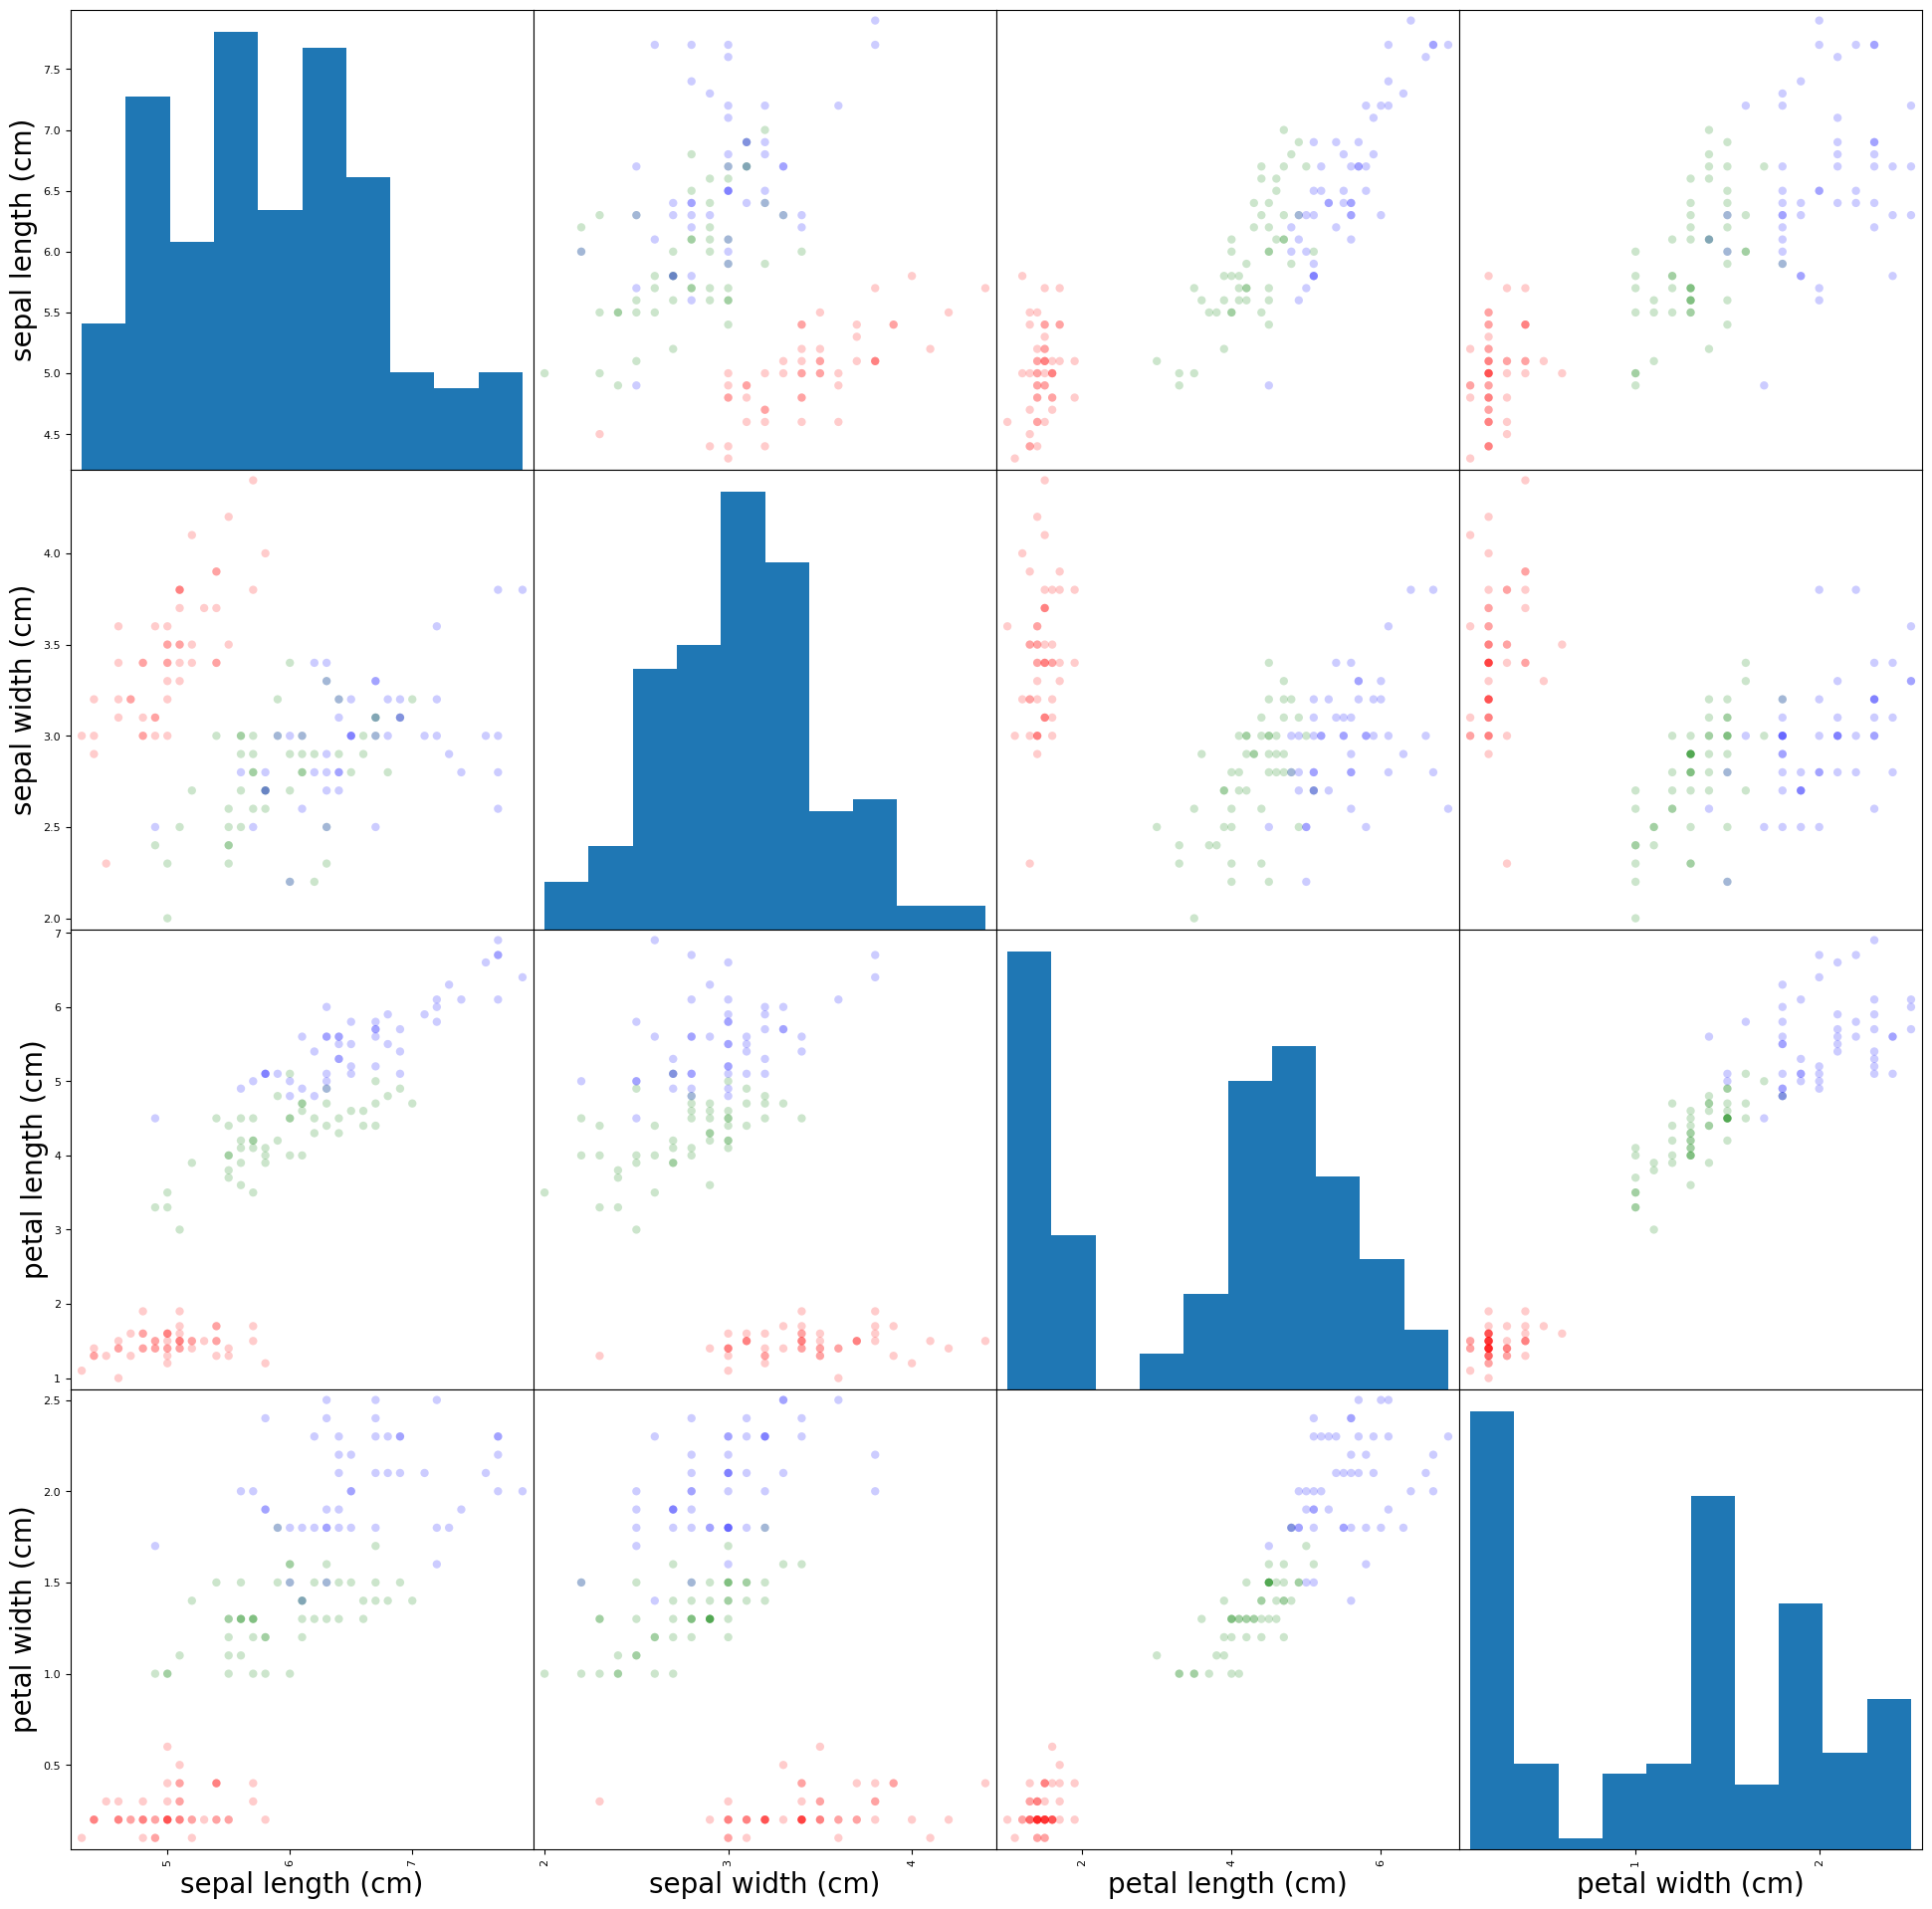

In [40]:
from sklearn.datasets import load_iris
from numpy import array
from pandas import DataFrame
from pandas.plotting import scatter_matrix

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

a = pd.read_csv('../data/data_remove_outliers.csv')
a = a.drop(['Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Body Mass (g)', 'Sex'], axis = 1)
iris = load_iris()
df = DataFrame(iris.data, columns=iris.feature_names)
colors=array(50*['r']+50*['g']+50*['b'])
scatter_matrix(df, alpha=0.2, figsize=(24,24), color=colors, marker = 'o')

array([[<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Length (mm)'>,
        <AxesSubplot:xlabel='Culmen Depth (mm)', ylabel='Culmen Length (mm)'>,
        <AxesSubplot:xlabel='Flipper Length (mm)', ylabel='Culmen Length (mm)'>,
        <AxesSubplot:xlabel='Body Mass (g)', ylabel='Culmen Length (mm)'>],
       [<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>,
        <AxesSubplot:xlabel='Culmen Depth (mm)', ylabel='Culmen Depth (mm)'>,
        <AxesSubplot:xlabel='Flipper Length (mm)', ylabel='Culmen Depth (mm)'>,
        <AxesSubplot:xlabel='Body Mass (g)', ylabel='Culmen Depth (mm)'>],
       [<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Flipper Length (mm)'>,
        <AxesSubplot:xlabel='Culmen Depth (mm)', ylabel='Flipper Length (mm)'>,
        <AxesSubplot:xlabel='Flipper Length (mm)', ylabel='Flipper Length (mm)'>,
        <AxesSubplot:xlabel='Body Mass (g)', ylabel='Flipper Length (mm)'>],
       [<AxesSubplot:xlabel='Culmen Length (mm)', yl

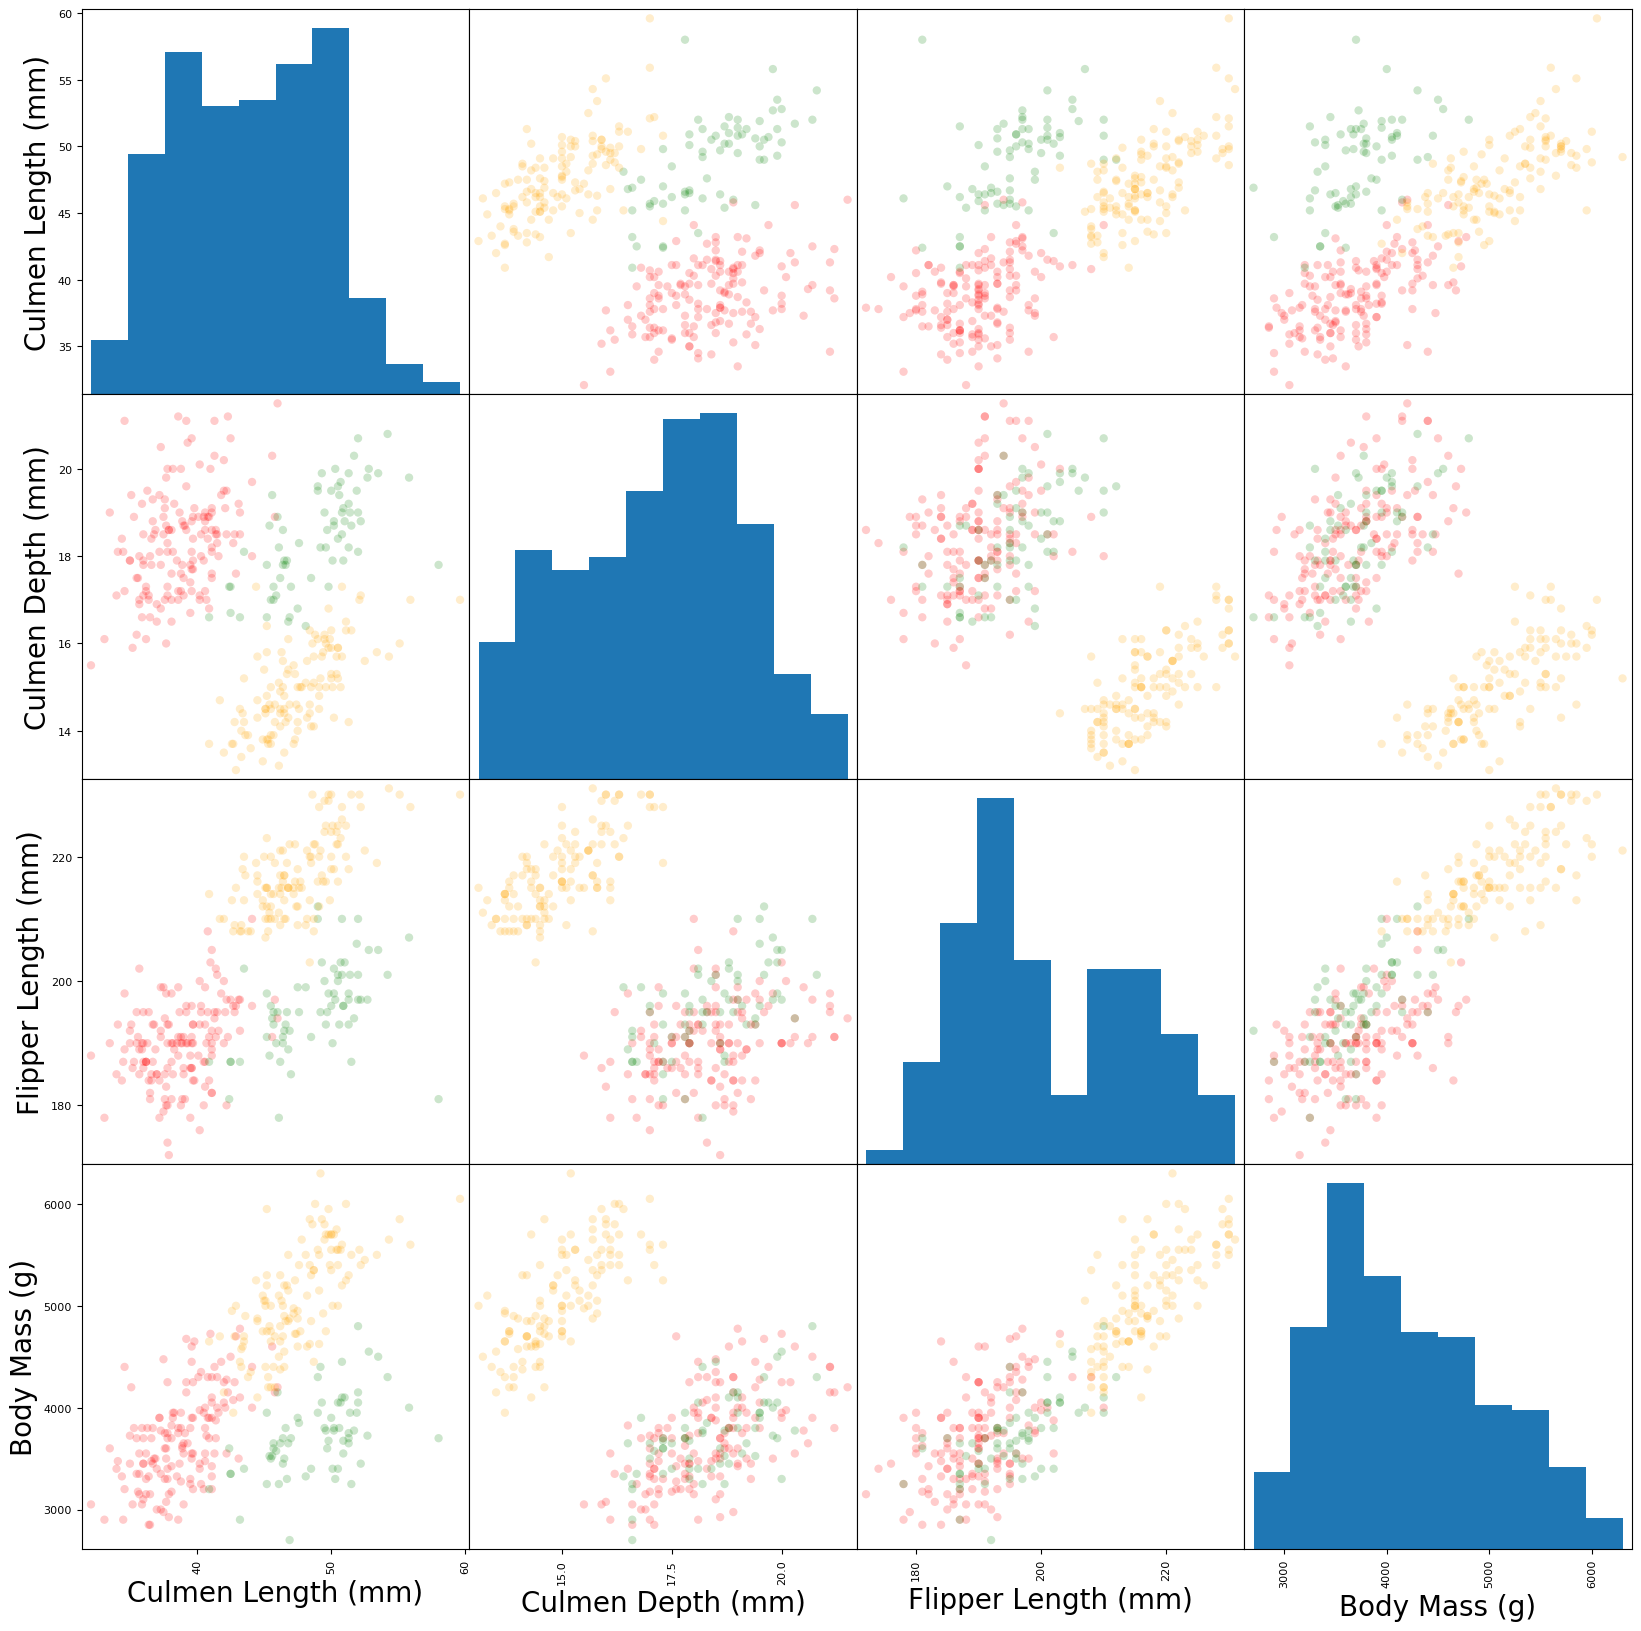

In [69]:
from sklearn.datasets import load_iris
from numpy import array
from pandas import DataFrame
from pandas.plotting import scatter_matrix

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

a = pd.read_csv('../data/data_remove_outliers.csv')
b = a[['Species']].copy().values
a = a.drop(['Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Species', 'Sex'], axis = 1).values
iris = load_iris()
df = DataFrame(a, columns=['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)'])
colors=array(151*['red']+68*['g']+123*['orange'])
scatter_matrix(df, alpha=0.2, figsize=(20,20), color = colors, marker = 'o')

In [63]:
pd.read_csv('../data/data_remove_outliers.csv').drop(['Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Species', 'Sex'], axis = 1)

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0
...,...,...,...,...
337,47.2,13.7,214.0,4925.0
338,46.8,14.3,215.0,4850.0
339,50.4,15.7,222.0,5750.0
340,45.2,14.8,212.0,5200.0


In [54]:
np.count_nonzero(b == 'Adelie Penguin (Pygoscelis adeliae)'), np.count_nonzero(b == 'Chinstrap penguin (Pygoscelis antarctica)'), np.count_nonzero(b == 'Gentoo penguin (Pygoscelis papua)')

(151, 68, 123)

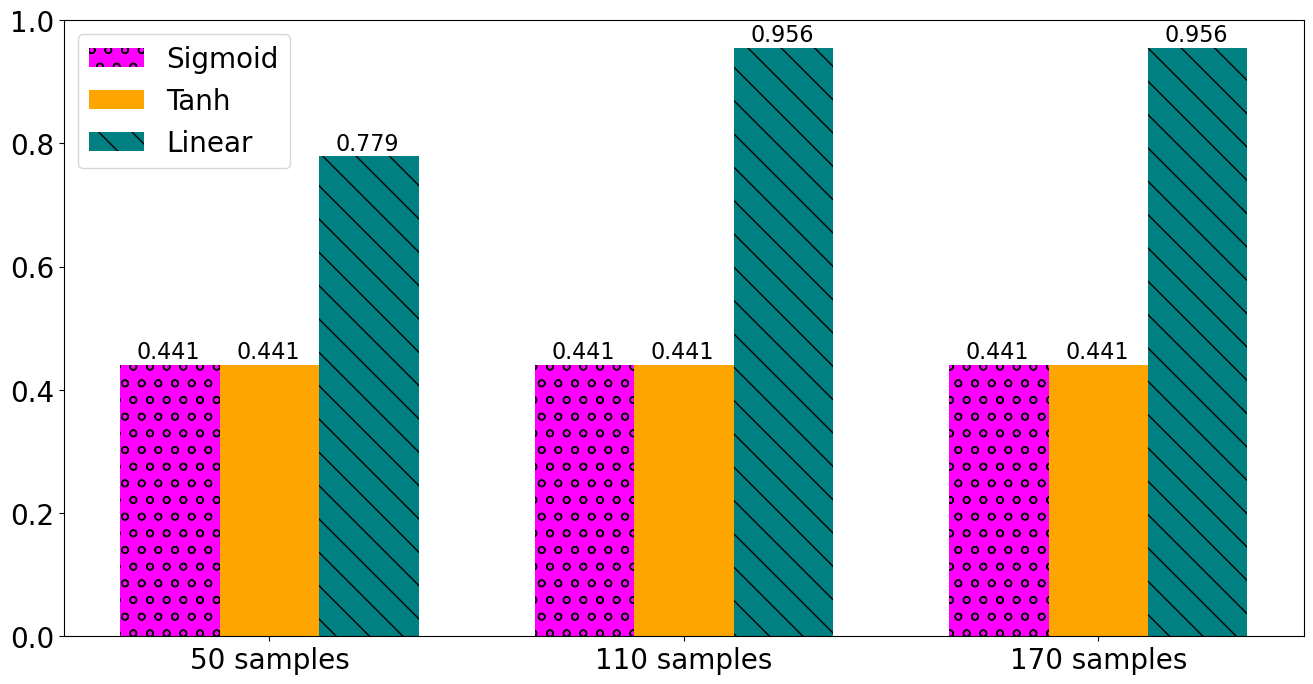

In [21]:
objects = ('50 samples', '110 samples', '170 samples')
y_pos = np.arange(len(objects))
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = '20'

sigmoids = [0.4411,0.4411,0.4411]
tanhs = [0.4411,0.4411,0.4411]
relus = [0.779,0.9558,0.9558]

for index, value in enumerate(sigmoids):
    plt.text(index - 0.32, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(tanhs):
    plt.text(index - 0.08, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
for index, value in enumerate(relus):
    plt.text(index + 0.16, value + 0.01, str("{:.3f}".format(value)), fontsize=16)
# for index, value in enumerate(min_rewardVSs):
#     plt.text(index + 0.25, value + 0.1, str("{:.3f}".format(value)), fontsize=14)
#plt.bar(y_pos, performance, align='center', alpha=0.5)
bars_sigmoid = plt.bar(y_pos - 0.24, sigmoids, 0.24, label = 'Sigmoid', color = 'magenta')
plt.bar(y_pos, tanhs, 0.24, label = 'Tanh', color = 'orange')
bars_linear = plt.bar(y_pos + 0.24, relus, 0.24, label = 'Linear', color = 'teal')
#plt.bar(y_pos + 0.36, min_rewardVSs, 0.24, label = 'Lowest tolerance latency in a time slot compared to 5 VS')
plt.xticks(y_pos, objects)
plt.ylim([0, 1])
patterns = ("o", "o", "o")
for i, x in zip(bars_sigmoid,patterns):
      i.set_hatch(x)
patterns = ("\\", "\\", "\\")
for i, x in zip(bars_linear,patterns):
      i.set_hatch(x)
plt.legend(fontsize = 20)
#plt.margins(0.1,0)
plt.savefig('../pics/ANN/activation_with_different_data.svg', bbox_inches='tight')
plt.savefig('../pics/ANN/activation_with_different_data.pdf', bbox_inches='tight')
plt.show()